In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge #ordinary linear regression + w/ ridge regularization
from sklearn.preprocessing import StandardScaler, PolynomialFeatures


In [41]:
years_list = pd.DataFrame([x for x in range(2007,2019)])

# Import data from CSVs

In [4]:
pit_data = pd.read_csv('df_pit_clean.csv')
pit_data

,CoC Number,CoC Name,CoC Category,"Overall Homeless, 2018","Overall Homeless, 2017","Overall Homeless, 2016","Overall Homeless, 2015","Overall Homeless, 2014","Overall Homeless, 2013","Overall Homeless, 2012","Overall Homeless, 2011","Overall Homeless, 2010","Overall Homeless, 2009","Overall Homeless, 2008","Overall Homeless, 2007"
0,AK-500,Anchorage CoC,Other Urban CoCs,1094,1128,1105,1208,1023,1122,1147,1223,1231.0,1267.0,1023.0,974
1,AK-501,Alaska Balance of State CoC,Rural CoCs,922,717,835,748,761,824,766,905,632.0,725.0,623.0,668
2,AL-500,"Birmingham/Jefferson, St. Clair, Shelby Counti...",Suburban CoCs,901,1092,1228,1153,1329,1469,1707,1950,2273.0,2273.0,2104.0,2104
3,AL-501,Mobile City & County/Baldwin County CoC,Other Urban CoCs,551,606,623,578,598,493,634,718,883.0,747.0,524.0,649
4,AL-502,Florence/Northwest Alabama CoC,Rural CoCs,256,155,337,245,209,223,192,244,170.0,281.0,249.0,265
5,AL-503,Huntsville/North Alabama CoC,Other Urban CoCs,424,436,385,420,536,586,607,656,819.0,664.0,714.0,830
6,AL-504,Montgomery City & County CoC,Other Urban CoCs,369,377,367,441,490,515,487,433,444.0,377.0,444.0,456
7,AL-505,Gadsden/Northeast Alabama CoC,Rural CoCs,146,163,167,156,438,399,544,495,370.0,433.0,298.0,119
8,AL-506,Tuscaloosa City & County CoC,Other Urban CoCs,57,200,177,339,245,99,152,265,278.0,270.0,196.0,345
9,AL-507,Alabama Balance of State CoC,Rural CoCs,730,764,827,638,716,905,886,797,809.0,1035.0,858.0,684


In [5]:
address_df = pd.read_csv("city_state_zip_df_multi.csv")
address_df

,CoC Number,city_state_zip,multi_coc
0,AK-500,"Anchorage, AK 99503",0.0
1,AK-501,"Anchorage, AK 99510",0.0
2,AL-500,"Birmingham, AL 35233",0.0
3,AL-501,"Mobile, AL 36609",0.0
4,AL-502,"Florence, AL 35630",0.0
5,AL-503,"Huntsville, AL 35816",0.0
6,AL-504,"Montgomery, AL 36109",0.0
7,AL-505,"Birmingham, AL 35203-5302",0.0
8,AL-506,"Tuscaloosa, AL 35401",0.0
9,AL-507,"Montgomery, AL 36101",0.0


In [6]:
pop_all = pd.read_csv("pop_clean.csv")
# pop_all


In [7]:
land_area = pd.read_csv('land_area_df.csv')
land_area

,state_name,state_fips,city_county,land_area,housing_units,state_abbrev
0,Alabama,1,Alabama,50645.33,2171853,AL
1,Alabama,1,"Abanda CDP, Chambers County",3.00,79,AL
2,Alabama,1,"Abbeville city, Henry County",15.54,1255,AL
3,Alabama,1,"Adamsville city, Jefferson County",25.13,1990,AL
4,Alabama,1,"Addison town, Winston County",3.77,351,AL
5,Alabama,1,"Akron town, Hale County",0.69,205,AL
6,Alabama,1,"Alabaster city, Shelby County",25.04,11295,AL
7,Alabama,1,"Albertville city, Marshall County",26.56,8128,AL
8,Alabama,1,"Alexander City city, Tallapoosa County",40.84,6834,AL
9,Alabama,1,"Alexandria CDP, Calhoun County",11.11,1599,AL


# Re-format address data

In [10]:
# split city_state_zip on "," to get city 
# then split on " " to get state and zip


In [11]:
# address_df['address_list'][0] = address_df['address_list'][:-1] does not work.
# df2[['team1','team2']] = pd.DataFrame(df2.teams.values.tolist(), index= df2.index)
df_1 = pd.DataFrame(address_df['city_state_zip'].str.split(", ").values.tolist(), columns=['city','state_zip'])
df_1

,city,state_zip
0,Anchorage,AK 99503
1,Anchorage,AK 99510
2,Birmingham,AL 35233
3,Mobile,AL 36609
4,Florence,AL 35630
5,Huntsville,AL 35816
6,Montgomery,AL 36109
7,Birmingham,AL 35203-5302
8,Tuscaloosa,AL 35401
9,Montgomery,AL 36101


In [12]:
df_2 = pd.DataFrame(df_1['state_zip'].str.split(" ").values.tolist(), columns=['state','zip'])
df_2

,state,zip
0,AK,99503
1,AK,99510
2,AL,35233
3,AL,36609
4,AL,35630
5,AL,35816
6,AL,36109
7,AL,35203-5302
8,AL,35401
9,AL,36101


In [13]:
address_df['city']=df_1['city']
address_df['state']=df_2['state']
address_df['zip']=df_2['zip']
address_df

,CoC Number,city_state_zip,multi_coc,city,state,zip
0,AK-500,"Anchorage, AK 99503",0.0,Anchorage,AK,99503
1,AK-501,"Anchorage, AK 99510",0.0,Anchorage,AK,99510
2,AL-500,"Birmingham, AL 35233",0.0,Birmingham,AL,35233
3,AL-501,"Mobile, AL 36609",0.0,Mobile,AL,36609
4,AL-502,"Florence, AL 35630",0.0,Florence,AL,35630
5,AL-503,"Huntsville, AL 35816",0.0,Huntsville,AL,35816
6,AL-504,"Montgomery, AL 36109",0.0,Montgomery,AL,36109
7,AL-505,"Birmingham, AL 35203-5302",0.0,Birmingham,AL,35203-5302
8,AL-506,"Tuscaloosa, AL 35401",0.0,Tuscaloosa,AL,35401
9,AL-507,"Montgomery, AL 36101",0.0,Montgomery,AL,36101


In [14]:
address_df[address_df['state']=='PR']

,CoC Number,city_state_zip,multi_coc,city,state,zip
318,PR-502,"San Juan, PR 00910",0.0,San Juan,PR,00910
319,PR-503,"Caguas, PR 00726",0.0,Caguas,PR,00726


In [15]:
address_df.drop(index=[318,319], inplace=True)

# Explore pop_all dataframe

In [16]:
pop_all[pop_all['state_abbrev']=='AK']

,area_name,state_name,state_fips,summary_level,county_fips,place_fips,county_sub_fips,pop_2007,pop_2008,pop_2009,pop_2010,pop_2011,pop_2012,pop_2013,pop_2014,pop_2015,pop_2016,pop_2017,pop_2018,state_abbrev
1190,Adak city,Alaska,2,162,0,65,0,320.0,316.0,324.0,326,327,330,333,335,333,330,330,329,AK
1191,Akhiok city,Alaska,2,162,0,650,0,71.0,71.0,71.0,71,72,73,73,72,71,70,71,70,AK
1192,Akiak city,Alaska,2,162,0,870,0,336.0,338.0,341.0,346,353,378,381,383,382,383,392,394,AK
1193,Akutan city,Alaska,2,162,0,1090,0,980.0,973.0,1012.0,1027,1034,1037,1040,1040,1043,1043,1051,1052,AK
1194,Alakanuk city,Alaska,2,162,0,1200,0,673.0,673.0,679.0,677,719,729,742,753,767,759,765,773,AK
1195,Aleknagik city,Alaska,2,162,0,1420,0,218.0,215.0,216.0,219,224,224,226,225,225,223,221,224,AK
1196,Allakaket city,Alaska,2,162,0,1860,0,100.0,101.0,101.0,105,172,171,169,166,165,167,166,164,AK
1197,Ambler city,Alaska,2,162,0,1970,0,272.0,267.0,261.0,258,264,264,265,266,267,264,266,262,AK
1198,Anaktuvuk Pass city,Alaska,2,162,0,2080,0,295.0,305.0,313.0,324,331,337,341,341,341,339,343,344,AK
1199,Anchorage municipality,Alaska,2,162,0,3000,0,278792.0,281554.0,287677.0,291826,296154,298233,301155,299927,297613,297216,294264,291538,AK


In [17]:
pop_all.dtypes

area_name           object
state_name          object
state_fips           int64
summary_level        int64
county_fips          int64
place_fips           int64
county_sub_fips      int64
pop_2007           float64
pop_2008           float64
pop_2009           float64
pop_2010            object
pop_2011             int64
pop_2012             int64
pop_2013             int64
pop_2014             int64
pop_2015             int64
pop_2016             int64
pop_2017             int64
pop_2018             int64
state_abbrev        object
dtype: object

In [18]:
pop_all['pop_2010'] = pd.to_numeric(pop_all['pop_2010']) # unable to parse because value at index 1247 is "A".

ValueError: Unable to parse string "A" at position 1247

In [19]:
pop_all.iloc[1247] # why is population count of Kachemak, Alaska just the letter "A"?

area_name          Kachemak city
state_name                Alaska
state_fips                     2
summary_level                162
county_fips                    0
place_fips                 36540
county_sub_fips                0
pop_2007                     455
pop_2008                     457
pop_2009                     467
pop_2010                       A
pop_2011                     482
pop_2012                     486
pop_2013                     487
pop_2014                     489
pop_2015                     491
pop_2016                     493
pop_2017                     492
pop_2018                     490
state_abbrev                  AK
Name: 1247, dtype: object

In [20]:
pop_all.drop(index=1247, inplace=True)

In [21]:
pop_all['pop_2010'] = pd.to_numeric(pop_all['pop_2010']) # NOW unable to parse because "A" at index 1400.

ValueError: Unable to parse string "A" at position 1400

In [22]:
pop_all.iloc[1400] # Kachemak, Alaska again? Why? It's not even in my final dataframe.

area_name          Kachemak city
state_name                Alaska
state_fips                     2
summary_level                157
county_fips                  122
place_fips                 36540
county_sub_fips                0
pop_2007                     455
pop_2008                     457
pop_2009                     467
pop_2010                       A
pop_2011                     482
pop_2012                     486
pop_2013                     487
pop_2014                     489
pop_2015                     491
pop_2016                     493
pop_2017                     492
pop_2018                     490
state_abbrev                  AK
Name: 1401, dtype: object

In [23]:
pop_all[pop_all['pop_2010']=='A'] # remove these values at the arithmetic stage later in the notebook.

,area_name,state_name,state_fips,summary_level,county_fips,place_fips,county_sub_fips,pop_2007,pop_2008,pop_2009,pop_2010,pop_2011,pop_2012,pop_2013,pop_2014,pop_2015,pop_2016,pop_2017,pop_2018,state_abbrev
1401,Kachemak city,Alaska,2,157,122,36540,0,455.0,457.0,467.0,A,482,486,487,489,491,493,492,490,AK
1487,Kake city,Alaska,2,157,198,36770,0,593.0,572.0,558.0,A,572,577,576,576,579,578,572,563,AK
1490,Port Alexander city,Alaska,2,157,198,62510,0,59.0,56.0,53.0,A,53,54,54,54,55,55,54,53,AK
9797,Peru city (pt.),Illinois,17,157,11,59234,0,37.0,39.0,41.0,A,0,0,0,0,0,0,0,0,IL
9798,Peru city (pt.),Illinois,17,157,11,59234,0,10183.0,10238.0,10244.0,A,0,0,0,0,0,0,0,0,IL
9846,Peru city (pt.),Illinois,17,71,11,59234,32265,37.0,39.0,41.0,A,0,0,0,0,0,0,0,0,IL
9847,Peru city (pt.),Illinois,17,71,11,59234,32265,10183.0,10238.0,10244.0,A,0,0,0,0,0,0,0,0,IL
10598,Homer Glen village (pt.),Illinois,17,157,31,35835,0,24974.0,24755.0,24416.0,A,0,0,0,0,0,0,0,0,IL
10599,Homer Glen village (pt.),Illinois,17,157,31,35835,0,45.0,46.0,47.0,A,0,0,0,0,0,0,0,0,IL
10847,Evanston city,Illinois,17,61,31,0,24582,73487.0,73755.0,74187.0,A,75145,75741,76013,76034,75671,75302,74667,74106,IL


In [24]:
# trying to find Anchorage to match up with address_df's AK values
# pop_all[pop_all['state_abbrev']=='AK' & pop_all['area_name'].str.startswith('A')]
pop_all[pop_all['area_name'].str.startswith('A') & pop_all['state_name'].str.startswith('Alaska') & pop_all['area_name'].str.startswith('Anchor')]


,area_name,state_name,state_fips,summary_level,county_fips,place_fips,county_sub_fips,pop_2007,pop_2008,pop_2009,pop_2010,pop_2011,pop_2012,pop_2013,pop_2014,pop_2015,pop_2016,pop_2017,pop_2018,state_abbrev
1199,Anchorage municipality,Alaska,2,162,0,3000,0,278792.0,281554.0,287677.0,291826,296154,298233,301155,299927,297613,297216,294264,291538,AK
1350,Anchorage Municipality,Alaska,2,50,20,0,0,278792.0,281554.0,287677.0,291826,296154,298233,301155,299927,297613,297216,294264,291538,AK
1351,Anchorage municipality,Alaska,2,157,20,3000,0,278792.0,281554.0,287677.0,291826,296154,298233,301155,299927,297613,297216,294264,291538,AK


In [25]:
# summary_level 50 = County; 157 = County place part; 162 = Incorporated place

In [26]:
# repeat process to look at categorization of a city e.g. Birmingham, AL
pop_all[pop_all['area_name'].str.startswith('Birming') & pop_all['state_name'].str.startswith('Alab')]

,area_name,state_name,state_fips,summary_level,county_fips,place_fips,county_sub_fips,pop_2007,pop_2008,pop_2009,pop_2010,pop_2011,pop_2012,pop_2013,pop_2014,pop_2015,pop_2016,pop_2017,pop_2018,state_abbrev
41,Birmingham city,Alabama,1,162,0,7000,0,218880.0,216505.0,214394.0,212237,211566,210749,211230,211109,211703,211436,210966,209880,AL
836,Birmingham city (pt.),Alabama,1,157,73,7000,0,217554.0,215063.0,212842.0,210609,210019,209188,209647,209516,210095,209820,209346,208266,AL
837,Birmingham city (pt.),Alabama,1,157,73,7000,0,1326.0,1442.0,1552.0,210609,210019,209188,209647,209516,210095,209820,209346,208266,AL
1079,Birmingham city (pt.),Alabama,1,157,117,7000,0,217554.0,215063.0,212842.0,1628,1547,1561,1583,1593,1608,1616,1620,1614,AL
1080,Birmingham city (pt.),Alabama,1,157,117,7000,0,1326.0,1442.0,1552.0,1628,1547,1561,1583,1593,1608,1616,1620,1614,AL


In [27]:
# summary_level 157 = County place part; 162 = Incorporated place

In [28]:
pop_all[pop_all['area_name'].str.startswith('Phoen') & pop_all['state_name'].str.startswith('Ariz')]

,area_name,state_name,state_fips,summary_level,county_fips,place_fips,county_sub_fips,pop_2007,pop_2008,pop_2009,pop_2010,pop_2011,pop_2012,pop_2013,pop_2014,pop_2015,pop_2016,pop_2017,pop_2018,state_abbrev
1581,Phoenix city,Arizona,4,162,0,55000,0,1450901.0,1456729.0,1452679.0,1445632,1470052,1499839,1527336,1556552,1584927,1613581,1634984,1660272,AZ
1681,Phoenix city,Arizona,4,157,13,55000,0,1450901.0,1456729.0,1452679.0,1445632,1470052,1499839,1527336,1556552,1584927,1613581,1634984,1660272,AZ


In [29]:
pit_data.columns

Index(['CoC Number', 'CoC Name', 'CoC Category', 'Overall Homeless, 2018',
       'Overall Homeless, 2017', 'Overall Homeless, 2016',
       'Overall Homeless, 2015', 'Overall Homeless, 2014',
       'Overall Homeless, 2013', 'Overall Homeless, 2012',
       'Overall Homeless, 2011', 'Overall Homeless, 2010',
       'Overall Homeless, 2009', 'Overall Homeless, 2008',
       'Overall Homeless, 2007'],
      dtype='object')

In [30]:
pit_data[pit_data['CoC Number'].str.startswith('AZ') & pit_data['CoC Name'].str.startswith('Phoen')]

,CoC Number,CoC Name,CoC Category,"Overall Homeless, 2018","Overall Homeless, 2017","Overall Homeless, 2016","Overall Homeless, 2015","Overall Homeless, 2014","Overall Homeless, 2013","Overall Homeless, 2012","Overall Homeless, 2011","Overall Homeless, 2010","Overall Homeless, 2009","Overall Homeless, 2008","Overall Homeless, 2007"
15,AZ-502,"Phoenix, Mesa/Maricopa County CoC",Major Cities,6298,5605,5702,5631,5918,5889,6485,5831,6999.0,7889.0,7189.0,8448


In [31]:
pit_data[pit_data['CoC Number'].str.startswith('WA') & pit_data['CoC Name'].str.startswith('Sea')]

,CoC Number,CoC Name,CoC Category,"Overall Homeless, 2018","Overall Homeless, 2017","Overall Homeless, 2016","Overall Homeless, 2015","Overall Homeless, 2014","Overall Homeless, 2013","Overall Homeless, 2012","Overall Homeless, 2011","Overall Homeless, 2010","Overall Homeless, 2009","Overall Homeless, 2008","Overall Homeless, 2007"
369,WA-500,Seattle/King County CoC,Major Cities,12112,11643,10730,10122,8949,9106,8899,8972,9022.0,8952.0,8501.0,7902


In [32]:
pop_all[pop_all['area_name'].str.startswith('Seatt') & pop_all['state_name'].str.startswith('Wash')]

,area_name,state_name,state_fips,summary_level,county_fips,place_fips,county_sub_fips,pop_2007,pop_2008,pop_2009,pop_2010,pop_2011,pop_2012,pop_2013,pop_2014,pop_2015,pop_2016,pop_2017,pop_2018,state_abbrev
123797,Seattle city,Washington,53,162,0,63000,0,586956.0,593588.0,604189.0,608660,623050,636495,654224,670925,688156,710510,729601,744955,WA
124012,Seattle city,Washington,53,157,33,63000,0,586956.0,593588.0,604189.0,608660,623050,636495,654224,670925,688156,710510,729601,744955,WA


In [33]:
pop_all[pop_all['summary_level']==162]

,area_name,state_name,state_fips,summary_level,county_fips,place_fips,county_sub_fips,pop_2007,pop_2008,pop_2009,pop_2010,pop_2011,pop_2012,pop_2013,pop_2014,pop_2015,pop_2016,pop_2017,pop_2018,state_abbrev
0,Abbeville city,Alabama,1,162,0,124,0,2784.0,2742.0,2714.0,2688,2677,2629,2612,2595,2588,2573,2566,2563,AL
1,Adamsville city,Alabama,1,162,0,460,0,4633.0,4594.0,4558.0,4522,4496,4474,4453,4432,4406,4373,4342,4325,AL
2,Addison town,Alabama,1,162,0,484,0,750.0,752.0,759.0,758,751,744,743,740,735,734,728,724,AL
3,Akron town,Alabama,1,162,0,676,0,395.0,384.0,369.0,356,345,345,341,339,337,332,332,330,AL
4,Alabaster city,Alabama,1,162,0,820,0,29020.0,29630.0,30107.0,30352,31346,31653,31946,32149,32739,32984,33223,33340,AL
5,Albertville city,Alabama,1,162,0,988,0,20014.0,20482.0,20875.0,21160,21391,21436,21425,21356,21395,21451,21493,21568,AL
6,Alexander City city,Alabama,1,162,0,1132,0,14848.0,14922.0,14964.0,14875,14890,14764,14836,14787,14658,14618,14572,14467,AL
7,Aliceville city,Alabama,1,162,0,1228,0,2515.0,2511.0,2494.0,2486,2426,2418,2392,2368,2359,2343,2335,2301,AL
8,Allgood town,Alabama,1,162,0,1396,0,641.0,638.0,631.0,622,623,622,621,622,621,621,622,622,AL
9,Altoona town,Alabama,1,162,0,1660,0,942.0,939.0,934.0,933,935,933,929,925,921,919,918,914,AL


In [9]:
# take only summary_level = 162 Incorporated Area
pop_inc = pop_all[pop_all['summary_level']==162]

In [10]:
pop_inc[pop_inc['area_name'].str.startswith('Seatt') & pop_inc['state_name'].str.startswith('Wash')]

,area_name,state_name,state_fips,summary_level,county_fips,place_fips,county_sub_fips,pop_2007,pop_2008,pop_2009,pop_2010,pop_2011,pop_2012,pop_2013,pop_2014,pop_2015,pop_2016,pop_2017,pop_2018,state_abbrev
123797,Seattle city,Washington,53,162,0,63000,0,586956.0,593588.0,604189.0,608660,623050,636495,654224,670925,688156,710510,729601,744955,WA


## create Seattle Population Density vs Homeless Rate plot

In [11]:
pop_inc.columns

Index(['area_name', 'state_name', 'state_fips', 'summary_level', 'county_fips',
       'place_fips', 'county_sub_fips', 'pop_2007', 'pop_2008', 'pop_2009',
       'pop_2010', 'pop_2011', 'pop_2012', 'pop_2013', 'pop_2014', 'pop_2015',
       'pop_2016', 'pop_2017', 'pop_2018', 'state_abbrev'],
      dtype='object')

In [12]:
seattle_pop = pop_inc[['pop_2007', 'pop_2008', 'pop_2009',
       'pop_2010', 'pop_2011', 'pop_2012', 'pop_2013', 'pop_2014', 'pop_2015',
       'pop_2016', 'pop_2017', 'pop_2018']][pop_inc['area_name'].str.startswith('Seatt') & pop_inc['state_name'].str.startswith('Wash')]

In [13]:
seattle_pit = pit_data[pit_data['CoC Number'].str.startswith('WA') & pit_data['CoC Name'].str.startswith('Sea')]

In [22]:
seattle_pit.columns

Index(['Overall Homeless, 2007', 'Overall Homeless, 2008',
       'Overall Homeless, 2009', 'Overall Homeless, 2010',
       'Overall Homeless, 2011', 'Overall Homeless, 2012',
       'Overall Homeless, 2013', 'Overall Homeless, 2014',
       'Overall Homeless, 2015', 'Overall Homeless, 2016',
       'Overall Homeless, 2017', 'Overall Homeless, 2018'],
      dtype='object')

In [21]:
seattle_pit = seattle_pit[['Overall Homeless, 2007','Overall Homeless, 2008','Overall Homeless, 2009',
                           'Overall Homeless, 2010','Overall Homeless, 2011','Overall Homeless, 2012',
                           'Overall Homeless, 2013','Overall Homeless, 2014','Overall Homeless, 2015',
                           'Overall Homeless, 2016','Overall Homeless, 2017','Overall Homeless, 2018',]]

In [14]:
land_area.columns

Index(['state_name', 'state_fips', 'city_county', 'land_area', 'housing_units',
       'state_abbrev'],
      dtype='object')

In [15]:
land_area[land_area['state_name'].str.startswith("Wa") & land_area['city_county'].str.startswith("Sea") ]

,state_name,state_fips,city_county,land_area,housing_units,state_abbrev
37653,Washington,53,"Seabeck CDP, Kitsap County",3.32,573,WA
37654,Washington,53,"SeaTac city, King County",10.03,10360,WA
37655,Washington,53,"Seattle city, King County",83.94,308516,WA


In [18]:
seattle_pop['pop_2010'] = pd.to_numeric(seattle_pop['pop_2010'])
# seattle_pop.dtypes

In [19]:
seattle_density = seattle_pop/83.94

In [33]:
years_list.T, seattle_pop, seattle_density

(0     2007
 1     2008
 2     2009
 3     2010
 4     2011
 5     2012
 6     2013
 7     2014
 8     2015
 9     2016
 10    2017
 11    2018
 dtype: int64,
         pop_2007  pop_2008  pop_2009  pop_2010  pop_2011  pop_2012  pop_2013  \
 123797  586956.0  593588.0  604189.0    608660    623050    636495    654224   
 
         pop_2014  pop_2015  pop_2016  pop_2017  pop_2018  
 123797    670925    688156    710510    729601    744955  ,
            pop_2007     pop_2008     pop_2009     pop_2010     pop_2011  \
 123797  6992.566119  7071.574934  7197.867524  7251.131761  7422.563736   
 
           pop_2012     pop_2013     pop_2014     pop_2015     pop_2016  \
 123797  7582.73767  7793.948058  7992.911604  8198.189183  8464.498451   
 
            pop_2017     pop_2018  
 123797  8691.934715  8874.851084  )

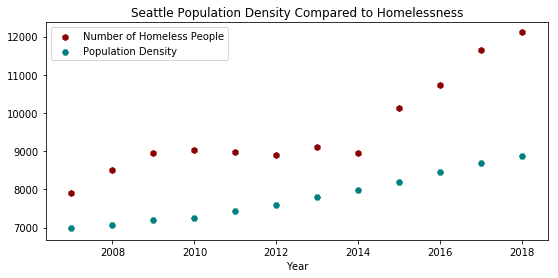

In [96]:
# plt.scatter(years_list.transpose(), seattle_pop)
plt.figure(figsize=(9,4))
plt.title("Seattle Population Density Compared to Homelessness")
plt.scatter(years_list.transpose(), seattle_pit, color='#8B0000', marker='h', label='Number of Homeless People')
plt.scatter(years_list.transpose(), seattle_density, color='#008080', marker='H', label='Population Density')
plt.legend()
plt.xlabel('Year');
# plt.savefig('seattle.svg');

## contine EDA

In [25]:
pop_inc['area_name'].value_counts() # why are there duplicates?

Franklin city                 16
Marion city                   16
Madison city                  14
Salem city                    14
Columbus city                 14
                              ..
Morgantown town                1
Martin's Additions village     1
Star Harbor city               1
Buckhorn city                  1
Wyandotte city                 1
Name: area_name, Length: 15411, dtype: int64

In [111]:
pop_inc[pop_inc['area_name']=='Salem city']

,area_name,state_name,state_fips,summary_level,county_fips,place_fips,county_sub_fips,pop_2007,pop_2008,pop_2009,pop_2010,pop_2011,pop_2012,pop_2013,pop_2014,pop_2015,pop_2016,pop_2017,pop_2018,state_abbrev
2170,Salem city,Arkansas,5,162,0,62150,0,1729.0,1703.0,1654.0,1635,1637,1628,1627,1616,1621,1616,1617,1637,AR
9253,Salem city,Illinois,17,162,0,67236,0,7595.0,7567.0,7497.0,7485,7403,7377,7317,7294,7249,7186,7145,7097,IL
19614,Salem city,Indiana,18,162,0,67464,0,6345.0,6346.0,6303.0,6319,6304,6236,6220,6224,6186,6163,6162,6197,IN
39120,Salem city,Iowa,19,162,0,70230,0,400.0,395.0,388.0,383,384,381,383,382,382,381,382,381,IA
50573,Salem city,Kentucky,21,162,0,68052,0,753.0,749.0,749.0,752,749,745,737,735,733,725,728,727,KY
53241,Salem city,Massachusetts,25,162,0,59105,0,40700.0,40886.0,41139.0,41340,41993,42320,42676,42998,43255,43254,43411,43559,MA
66179,Salem city,Missouri,29,162,0,65234,0,4947.0,4959.0,4940.0,4950,4924,4952,4976,4966,4972,4905,4909,4902,MO
72339,Salem city,New Jersey,34,162,0,65490,0,5363.0,5286.0,5217.0,5146,5077,5028,4974,4926,4860,4808,4778,4747,NJ
82932,Salem city,Ohio,39,162,0,69834,0,12384.0,12330.0,12296.0,12303,12250,12161,12088,12047,11946,11879,11790,11715,OH
103939,Salem city,Oregon,41,162,0,64900,0,150362.0,151841.0,153654.0,154637,156146,157369,158843,160721,163251,166599,169850,173442,OR


In [26]:
pop_inc[pop_inc['area_name']=='Marion city'] # because "Marion city" exists in multiple states, of course.

,area_name,state_name,state_fips,summary_level,county_fips,place_fips,county_sub_fips,pop_2007,pop_2008,pop_2009,pop_2010,pop_2011,pop_2012,pop_2013,pop_2014,pop_2015,pop_2016,pop_2017,pop_2018,state_abbrev
266,Marion city,Alabama,1,162,0,46768,0,3580.0,3634.0,3691.0,3686,3645,3568,3515,3464,3418,3365,3312,3252,AL
2061,Marion city,Arkansas,5,162,0,44180,0,11318.0,11711.0,12100.0,12345,12488,12450,12436,12454,12445,12521,12401,12364,AR
8929,Marion city,Illinois,17,162,0,46916,0,16915.0,17030.0,17166.0,17193,17329,17346,17746,17736,17607,17657,17598,17620,IL
19459,Marion city,Indiana,18,162,0,46908,0,30285.0,30289.0,30116.0,29948,29771,29470,29375,29127,28759,28386,28207,28047,IN
38889,Marion city,Iowa,19,162,0,49485,0,32524.0,33459.0,34230.0,34768,35808,36345,36800,37360,37900,38809,39426,39979,IA
41024,Marion city,Kansas,20,162,0,44750,0,1957.0,1939.0,1933.0,1927,1906,1879,1853,1847,1819,1804,1798,1787,KS
50479,Marion city,Kentucky,21,162,0,50034,0,3054.0,3085.0,3042.0,3039,3015,3003,2984,2976,2970,2951,2911,2872,KY
77965,Marion city,North Carolina,37,162,0,41420,0,8171.0,8074.0,7937.0,7838,8105,8051,8010,7962,7798,7712,7856,7871,NC
79364,Marion city,North Dakota,38,162,0,50780,0,137.0,135.0,133.0,133,131,131,130,131,132,131,131,130,ND
82670,Marion city,Ohio,39,162,0,47754,0,37223.0,37336.0,36919.0,36837,36939,36884,36723,36615,36321,36373,35983,36087,OH


In [112]:
pop_inc.drop(index=[125203,125204], inplace=True)

/anaconda3/envs/metis/lib/python3.7/site-packages/pandas/core/frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [113]:
pop_inc[pop_inc['area_name']=='Marion city'] # because "Marion city" exists in multiple states, of course.

,area_name,state_name,state_fips,summary_level,county_fips,place_fips,county_sub_fips,pop_2007,pop_2008,pop_2009,pop_2010,pop_2011,pop_2012,pop_2013,pop_2014,pop_2015,pop_2016,pop_2017,pop_2018,state_abbrev
266,Marion city,Alabama,1,162,0,46768,0,3580.0,3634.0,3691.0,3686,3645,3568,3515,3464,3418,3365,3312,3252,AL
2061,Marion city,Arkansas,5,162,0,44180,0,11318.0,11711.0,12100.0,12345,12488,12450,12436,12454,12445,12521,12401,12364,AR
8929,Marion city,Illinois,17,162,0,46916,0,16915.0,17030.0,17166.0,17193,17329,17346,17746,17736,17607,17657,17598,17620,IL
19459,Marion city,Indiana,18,162,0,46908,0,30285.0,30289.0,30116.0,29948,29771,29470,29375,29127,28759,28386,28207,28047,IN
38889,Marion city,Iowa,19,162,0,49485,0,32524.0,33459.0,34230.0,34768,35808,36345,36800,37360,37900,38809,39426,39979,IA
41024,Marion city,Kansas,20,162,0,44750,0,1957.0,1939.0,1933.0,1927,1906,1879,1853,1847,1819,1804,1798,1787,KS
50479,Marion city,Kentucky,21,162,0,50034,0,3054.0,3085.0,3042.0,3039,3015,3003,2984,2976,2970,2951,2911,2872,KY
77965,Marion city,North Carolina,37,162,0,41420,0,8171.0,8074.0,7937.0,7838,8105,8051,8010,7962,7798,7712,7856,7871,NC
79364,Marion city,North Dakota,38,162,0,50780,0,137.0,135.0,133.0,133,131,131,130,131,132,131,131,130,ND
82670,Marion city,Ohio,39,162,0,47754,0,37223.0,37336.0,36919.0,36837,36939,36884,36723,36615,36321,36373,35983,36087,OH


# split city_county column of land_area into new columns like for address_df


In [63]:
land_area.columns

Index(['state_name', 'state_fips', 'city_county', 'land_area', 'housing_units',
       'state_abbrev'],
      dtype='object')

In [64]:
land_area

,state_name,state_fips,city_county,land_area,housing_units,state_abbrev
0,Alabama,1,Alabama,50645.33,2171853,AL
1,Alabama,1,"Abanda CDP, Chambers County",3.00,79,AL
2,Alabama,1,"Abbeville city, Henry County",15.54,1255,AL
3,Alabama,1,"Adamsville city, Jefferson County",25.13,1990,AL
4,Alabama,1,"Addison town, Winston County",3.77,351,AL
...,...,...,...,...,...,...
40833,Puerto Rico,72,"Vieques zona urbana, Vieques Municipio",0.58,1173,PR
40834,Puerto Rico,72,"Villalba zona urbana, Villalba Municipio",1.19,1366,PR
40835,Puerto Rico,72,"Yabucoa zona urbana, Yabucoa Municipio",1.15,2795,PR
40836,Puerto Rico,72,"Yauco zona urbana, Yauco Municipio",2.87,7512,PR


In [65]:
len(land_area['state_name'].unique())

52

In [66]:
# df_1 = pd.DataFrame(address_df['city_state_zip'].str.split(", ").values.tolist(), columns=['city','state_zip'])
# df_1
df_place = pd.DataFrame(land_area['city_county'].str.split(", ").values.tolist(), columns=['city','county','other'])
df_place

,city,county,other
0,Alabama,None,None
1,Abanda CDP,Chambers County,None
2,Abbeville city,Henry County,None
3,Adamsville city,Jefferson County,None
4,Addison town,Winston County,None
...,...,...,...
40833,Vieques zona urbana,Vieques Municipio,None
40834,Villalba zona urbana,Villalba Municipio,None
40835,Yabucoa zona urbana,Yabucoa Municipio,None
40836,Yauco zona urbana,Yauco Municipio,None


In [67]:
# s.replace({'a': None})
# df_place[df_place['other'].str.startswith('None')]
df_place['other'].value_counts()

Moore County     1
Monroe County    1
Name: other, dtype: int64

In [68]:
df_place[df_place['city'].str.startswith('Floren')]

,city,county,other
206,Florence city,Lauderdale County,None
1163,Florence town,Pinal County,None
2567,Florence-Graham CDP,Los Angeles County,None
3801,Florence city,Fremont County,None
7143,Florence village,Pike County,None
8454,Florence CDP,Switzerland County,None
10339,Florence city,Marion County,None
11030,Florence city,Boone County,None
14383,Florence township,St. Joseph County,None
16563,Florence township,Goodhue County,None


In [69]:
land_area['city']=df_place['city']
land_area['county']=df_place['county']
land_area

,state_name,state_fips,city_county,land_area,housing_units,state_abbrev,city,county
0,Alabama,1,Alabama,50645.33,2171853,AL,Alabama,None
1,Alabama,1,"Abanda CDP, Chambers County",3.00,79,AL,Abanda CDP,Chambers County
2,Alabama,1,"Abbeville city, Henry County",15.54,1255,AL,Abbeville city,Henry County
3,Alabama,1,"Adamsville city, Jefferson County",25.13,1990,AL,Adamsville city,Jefferson County
4,Alabama,1,"Addison town, Winston County",3.77,351,AL,Addison town,Winston County
...,...,...,...,...,...,...,...,...
40833,Puerto Rico,72,"Vieques zona urbana, Vieques Municipio",0.58,1173,PR,Vieques zona urbana,Vieques Municipio
40834,Puerto Rico,72,"Villalba zona urbana, Villalba Municipio",1.19,1366,PR,Villalba zona urbana,Villalba Municipio
40835,Puerto Rico,72,"Yabucoa zona urbana, Yabucoa Municipio",1.15,2795,PR,Yabucoa zona urbana,Yabucoa Municipio
40836,Puerto Rico,72,"Yauco zona urbana, Yauco Municipio",2.87,7512,PR,Yauco zona urbana,Yauco Municipio


In [70]:
type(df_place['other'].iloc[2])

NoneType

In [71]:
# df_place[df_place['other'].str.]

In [72]:
df_place.loc[(df_place['other'] == 'Moore County') | (df_place['other'] == 'Monroe County')]

,city,county,other
4918,Islamorada,Village of Islands village,Monroe County
33466,Lynchburg,Moore County metropolitan government,Moore County


In [73]:
address_df[address_df['city'].str.startswith("Lynchburg")]

,CoC Number,city_state_zip,multi_coc,city,state,zip
357,VA-508,"Lynchburg, VA 24503",0.0,Lynchburg,VA,24503


In [74]:
df_place[df_place['city'].str.startswith('Lynchburg')]

,city,county,other
18790,Lynchburg CDP,DeSoto County,None
26987,Lynchburg village,None,None
32586,Lynchburg town,Lee County,None
33466,Lynchburg,Moore County metropolitan government,Moore County
36858,Lynchburg city,None,None


In [78]:
# land_area.dropna(inplace=True) # removes 3970 rows
# land_area

## reorganize land_area for ease of use

In [75]:
land_area_reorg = land_area[['city','county','state_abbrev','land_area']]
land_area_reorg

,city,county,state_abbrev,land_area
0,Alabama,None,AL,50645.33
1,Abanda CDP,Chambers County,AL,3.00
2,Abbeville city,Henry County,AL,15.54
3,Adamsville city,Jefferson County,AL,25.13
4,Addison town,Winston County,AL,3.77
...,...,...,...,...
40833,Vieques zona urbana,Vieques Municipio,PR,0.58
40834,Villalba zona urbana,Villalba Municipio,PR,1.19
40835,Yabucoa zona urbana,Yabucoa Municipio,PR,1.15
40836,Yauco zona urbana,Yauco Municipio,PR,2.87


In [76]:
land_area_reorg[land_area_reorg['city'].str.startswith('Akron')]

,city,county,state_abbrev,land_area
5,Akron town,Hale County,AL,0.69
3632,Akron town,Washington County,CO,2.63
8247,Akron town,Fulton County,IN,0.46
9006,Akron city,Plymouth County,IA,1.22
13736,Akron village,Tuscola County,MI,0.94
13737,Akron township,Tuscola County,MI,52.75
15734,Akron township,Big Stone County,MN,48.97
15735,Akron township,Wilkin County,MN,35.39
22863,Akron village,Erie County,NY,1.98
26308,Akron city,Summit County,OH,62.03


In [77]:
address_df[address_df['city'].str.startswith("Akron")] 
# identical land_area['city'] values probably won't interfere with address_df merge because they're not in there.

,CoC Number,city_state_zip,multi_coc,city,state,zip
285,OH-506,"Akron, OH 44308",0.0,Akron,OH,44308


In [79]:
# taking each state/city combination should yield unique land areas.
# except for e.g. Marion City, WI

## retrieve city data from land_area

In [80]:
# df_place = pd.DataFrame(land_area['city_county'].str.split(", ").values.tolist(), columns=['city','county','other'])
# df_place

land_area_list = land_area_reorg['city'].str.split() # split "city" into list of lists
land_area_list

0                       [Alabama]
1                   [Abanda, CDP]
2               [Abbeville, city]
3              [Adamsville, city]
4                 [Addison, town]
                   ...           
40833     [Vieques, zona, urbana]
40834    [Villalba, zona, urbana]
40835     [Yabucoa, zona, urbana]
40836       [Yauco, zona, urbana]
40837         [Yaurel, comunidad]
Name: city, Length: 40838, dtype: object

In [117]:
address_df[address_df['state'] == "PR"]

,CoC Number,city_state_zip,multi_coc,city,state,zip


In [84]:
# take all except the last item in each listed list
city_list = [item[:-1] for item in land_area_list]

# join lists(within list) with whitespace
# https://www.geeksforgeeks.org/python-merge-list-elements/
city_list = [' '.join(item[:]) for item in city_list] # if len(item)>0]

city_list

['',
 'Abanda',
 'Abbeville',
 'Adamsville',
 'Addison',
 'Akron',
 'Alabaster',
 'Albertville',
 'Alexander City',
 'Alexandria',
 'Aliceville',
 'Allgood',
 'Altoona',
 'Blount County',
 'Etowah County',
 'Andalusia',
 'Anderson',
 'Anniston',
 'Arab',
 'Cullman County',
 'Marshall County',
 'Ardmore',
 'Argo',
 'Jefferson County',
 'St. Clair County',
 'Ariton',
 'Arley',
 'Ashford',
 'Ashland',
 'Ashville',
 'Athens',
 'Atmore',
 'Attalla',
 'Auburn',
 'Autaugaville',
 'Avon',
 'Axis',
 'Babbie',
 'Baileyton',
 'Bakerhill',
 'Ballplay',
 'Banks',
 'Bay Minette',
 'Bayou La Batre',
 'Bear Creek',
 'Beatrice',
 'Beaverton',
 'Belgreen',
 'Belk',
 'Bellamy',
 'Belle Fontaine',
 'Benton',
 'Berry',
 'Bessemer',
 'Billingsley',
 'Birmingham',
 'Jefferson County',
 'Shelby County',
 'Black',
 'Blountsville',
 'Blue Ridge',
 'Blue Springs',
 'Boaz',
 'Etowah County',
 'Marshall County',
 'Boligee',
 'Bon Air',
 'Boykin',
 'Brantley',
 'Brantleyville',
 'Brent',
 'Brewton',
 'Bridgeport',


In [85]:
# land_area_reorg[land_area_reorg['city'].str.startswith('Frisco')]
land_area_reorg

,city,county,state_abbrev,land_area
0,Alabama,None,AL,50645.33
1,Abanda CDP,Chambers County,AL,3.00
2,Abbeville city,Henry County,AL,15.54
3,Adamsville city,Jefferson County,AL,25.13
4,Addison town,Winston County,AL,3.77
...,...,...,...,...
40833,Vieques zona urbana,Vieques Municipio,PR,0.58
40834,Villalba zona urbana,Villalba Municipio,PR,1.19
40835,Yabucoa zona urbana,Yabucoa Municipio,PR,1.15
40836,Yauco zona urbana,Yauco Municipio,PR,2.87


In [86]:
land_area_final = land_area_reorg.copy()


In [87]:
land_area_final['city'] = city_list


In [88]:
land_area_final

,city,county,state_abbrev,land_area
0,,None,AL,50645.33
1,Abanda,Chambers County,AL,3.00
2,Abbeville,Henry County,AL,15.54
3,Adamsville,Jefferson County,AL,25.13
4,Addison,Winston County,AL,3.77
...,...,...,...,...
40833,Vieques zona,Vieques Municipio,PR,0.58
40834,Villalba zona,Villalba Municipio,PR,1.19
40835,Yabucoa zona,Yabucoa Municipio,PR,1.15
40836,Yauco zona,Yauco Municipio,PR,2.87


## find the state_abbrev values that exist in address_df

In [89]:
states_to_consider=list(set(address_df['state']))
states_to_consider

['UT',
 'WI',
 'TX',
 'NM',
 'PA',
 'SC',
 'OK',
 'HI',
 'NH',
 'TN',
 'LA',
 'SD',
 'KS',
 'IL',
 'NY',
 'VA',
 'VI',
 'PR',
 'OR',
 'DC',
 'RI',
 'IN',
 'AL',
 'MO',
 'NE',
 'MD',
 'AR',
 'IA',
 'AZ',
 'VT',
 'CT',
 'WA',
 'FL',
 'ID',
 'MS',
 'MN',
 'OH',
 'WV',
 'KY',
 'NJ',
 'GA',
 'NV',
 'MI',
 'AK',
 'CA',
 'DE',
 'ME',
 'MT',
 'ND',
 'NC',
 'GU',
 'CO',
 'MA',
 'WY']

# Merge land_area_final with address_df on city and state

In [118]:
land_area_final.columns, address_df.columns

(Index(['city', 'county', 'state_abbrev', 'land_area'], dtype='object'),
 Index(['CoC Number', 'city_state_zip', 'multi_coc', 'city', 'state', 'zip'], dtype='object'))

In [119]:
address_df.shape

(382, 6)

In [120]:
408-384

24

In [121]:
address_df.head(), len(address_df)

(  CoC Number        city_state_zip  multi_coc        city state    zip
 0     AK-500   Anchorage, AK 99503        0.0   Anchorage    AK  99503
 1     AK-501   Anchorage, AK 99510        0.0   Anchorage    AK  99510
 2     AL-500  Birmingham, AL 35233        0.0  Birmingham    AL  35233
 3     AL-501      Mobile, AL 36609        0.0      Mobile    AL  36609
 4     AL-502    Florence, AL 35630        0.0    Florence    AL  35630, 382)

In [122]:
land_area_final.head()

,city,county,state_abbrev,land_area
0,,None,AL,50645.33
1,Abanda,Chambers County,AL,3.00
2,Abbeville,Henry County,AL,15.54
3,Adamsville,Jefferson County,AL,25.13
4,Addison,Winston County,AL,3.77


In [123]:
merge_test_1 = pd.merge(address_df, 
                        land_area_final, 
                        how="left", 
                        left_on=['city','state'], 
                        right_on=['city','state_abbrev'], 
                        indicator=True)

In [124]:
merge_test_1.shape # somehow I gained 26 rows.

(408, 10)

In [125]:
merge_test_1['zip'].value_counts().loc[merge_test_1['zip'].value_counts().values > 1]

12210    8
17604    3
12401    2
10007    2
06134    2
55114    2
53703    2
14608    2
80205    2
12901    2
18901    2
48161    2
14850    2
55992    2
17120    2
56601    2
49855    2
12601    2
56172    2
49423    2
06604    2
14048    2
19601    2
18703    2
48843    2
10940    2
46204    2
07728    2
49221    2
55803    2
Name: zip, dtype: int64

In [126]:
address_df['zip'].value_counts().loc[address_df['zip'].value_counts().values > 1]

12210    8
55114    2
17120    2
80205    2
46204    2
Name: zip, dtype: int64

In [127]:
merge_test_1.head()

,CoC Number,city_state_zip,multi_coc,city,state,zip,county,state_abbrev,land_area,_merge
0,AK-500,"Anchorage, AK 99503",0.0,Anchorage,AK,99503,Anchorage Municipality,AK,1704.68,both
1,AK-501,"Anchorage, AK 99510",0.0,Anchorage,AK,99510,Anchorage Municipality,AK,1704.68,both
2,AL-500,"Birmingham, AL 35233",0.0,Birmingham,AL,35233,None,AL,146.07,both
3,AL-501,"Mobile, AL 36609",0.0,Mobile,AL,36609,Mobile County,AL,139.11,both
4,AL-502,"Florence, AL 35630",0.0,Florence,AL,35630,Lauderdale County,AL,26.00,both


In [128]:
# merge_test_1.dropna().reset_index() # somehow I lost 64 rows.

In [129]:
nan = merge_test_1[merge_test_1.isna().any(axis=1)]
nan.shape # somehow there are 88 rows with NaN.

(88, 10)

In [130]:
land_area[land_area['city_county'].str.startswith('Birmingham')]

,state_name,state_fips,city_county,land_area,housing_units,state_abbrev,city,county
55,Alabama,1,Birmingham city,146.07,108981,AL,Birmingham city,None
9089,Iowa,19,"Birmingham city, Van Buren County",1.06,213,IA,Birmingham city,Van Buren County
13918,Michigan,26,"Birmingham city, Oakland County",4.79,9979,MI,Birmingham city,Oakland County
19081,Missouri,29,"Birmingham village, Clay County",0.56,85,MO,Birmingham village,Clay County
29142,Pennsylvania,42,"Birmingham township, Chester County",6.32,1459,PA,Birmingham township,Chester County
29143,Pennsylvania,42,"Birmingham borough, Huntingdon County",0.06,45,PA,Birmingham borough,Huntingdon County


In [131]:
land_area_final[land_area_final['city'].str.startswith('Sea')]

,city,county,state_abbrev,land_area
1561,Searcy County,None,AR,0.01
1998,Searcy,White County,AR,18.34
3341,Seacliff,Santa Cruz County,CA,0.77
3342,Seal Beach,Orange County,CA,11.29
3343,Sea Ranch,Sonoma County,CA,16.14
3344,Searles Valley,San Bernardino County,CA,10.49
3345,Seaside,Monterey County,CA,9.24
4521,Seaford,Sussex County,DE,5.21
5289,Sea Ranch Lakes,Broward County,FL,0.18
7965,Seaton,Mercer County,IL,1.58


# Merge address_df with pop_inc on city and state

## get city data from pop_inc

In [132]:
pop_inc.head()

,area_name,state_name,state_fips,summary_level,county_fips,place_fips,county_sub_fips,pop_2007,pop_2008,pop_2009,pop_2010,pop_2011,pop_2012,pop_2013,pop_2014,pop_2015,pop_2016,pop_2017,pop_2018,state_abbrev
0,Abbeville city,Alabama,1,162,0,124,0,2784.0,2742.0,2714.0,2688,2677,2629,2612,2595,2588,2573,2566,2563,AL
1,Adamsville city,Alabama,1,162,0,460,0,4633.0,4594.0,4558.0,4522,4496,4474,4453,4432,4406,4373,4342,4325,AL
2,Addison town,Alabama,1,162,0,484,0,750.0,752.0,759.0,758,751,744,743,740,735,734,728,724,AL
3,Akron town,Alabama,1,162,0,676,0,395.0,384.0,369.0,356,345,345,341,339,337,332,332,330,AL
4,Alabaster city,Alabama,1,162,0,820,0,29020.0,29630.0,30107.0,30352,31346,31653,31946,32149,32739,32984,33223,33340,AL


In [133]:
# df_place = pd.DataFrame(land_area['city_county'].str.split(", ").values.tolist(), columns=['city','county','other'])
# df_place

# land_area_list = land_area_reorg['city'].str.split() # split "city" into list of lists
# land_area_list

city_area = pop_inc['area_name'].str.split()
city_area


0          [Abbeville, city]
1         [Adamsville, city]
2            [Addison, town]
3              [Akron, town]
4          [Alabaster, city]
                 ...        
130300     [Wamsutter, town]
130301     [Wheatland, town]
130302       [Worland, city]
130303        [Wright, town]
130304         [Yoder, town]
Name: area_name, Length: 19729, dtype: object

In [134]:
# take all except the last item in each listed list
pop_area = [item[:-1] for item in city_area]

# join lists(within list) with whitespace
# https://www.geeksforgeeks.org/python-merge-list-elements/
pop_area = [' '.join(item[:]) for item in pop_area] # if len(item)>0]

pop_area

['Abbeville',
 'Adamsville',
 'Addison',
 'Akron',
 'Alabaster',
 'Albertville',
 'Alexander City',
 'Aliceville',
 'Allgood',
 'Altoona',
 'Andalusia',
 'Anderson',
 'Anniston',
 'Arab',
 'Ardmore',
 'Argo',
 'Ariton',
 'Arley',
 'Ashford',
 'Ashland',
 'Ashville',
 'Athens',
 'Atmore',
 'Attalla',
 'Auburn',
 'Autaugaville',
 'Avon',
 'Babbie',
 'Baileyton',
 'Bakerhill',
 'Banks',
 'Bay Minette',
 'Bayou La Batre',
 'Bear Creek',
 'Beatrice',
 'Beaverton',
 'Belk',
 'Benton',
 'Berry',
 'Bessemer',
 'Billingsley',
 'Birmingham',
 'Black',
 'Blountsville',
 'Blue Springs',
 'Boaz',
 'Boligee',
 'Bon Air',
 'Brantley',
 'Brent',
 'Brewton',
 'Bridgeport',
 'Brighton',
 'Brilliant',
 'Brookside',
 'Brookwood',
 'Brundidge',
 'Butler',
 'Calera',
 'Camden',
 'Camp Hill',
 'Carbon Hill',
 'Cardiff',
 'Carolina',
 'Carrollton',
 'Castleberry',
 'Cedar Bluff',
 'Center Point',
 'Centre',
 'Centreville',
 'Chatom',
 'Chelsea',
 'Cherokee',
 'Chickasaw',
 'Childersburg',
 'Citronelle',
 'Cla

In [135]:
pop_inc['city'] = pop_area
pop_inc

/anaconda3/envs/metis/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,area_name,state_name,state_fips,summary_level,county_fips,place_fips,county_sub_fips,pop_2007,pop_2008,pop_2009,...,pop_2011,pop_2012,pop_2013,pop_2014,pop_2015,pop_2016,pop_2017,pop_2018,state_abbrev,city
0,Abbeville city,Alabama,1,162,0,124,0,2784.0,2742.0,2714.0,...,2677,2629,2612,2595,2588,2573,2566,2563,AL,Abbeville
1,Adamsville city,Alabama,1,162,0,460,0,4633.0,4594.0,4558.0,...,4496,4474,4453,4432,4406,4373,4342,4325,AL,Adamsville
2,Addison town,Alabama,1,162,0,484,0,750.0,752.0,759.0,...,751,744,743,740,735,734,728,724,AL,Addison
3,Akron town,Alabama,1,162,0,676,0,395.0,384.0,369.0,...,345,345,341,339,337,332,332,330,AL,Akron
4,Alabaster city,Alabama,1,162,0,820,0,29020.0,29630.0,30107.0,...,31346,31653,31946,32149,32739,32984,33223,33340,AL,Alabaster
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130300,Wamsutter town,Wyoming,56,162,0,81300,0,392.0,414.0,444.0,...,454,462,488,510,502,494,486,478,WY,Wamsutter
130301,Wheatland town,Wyoming,56,162,0,83040,0,3594.0,3584.0,3592.0,...,3622,3627,3626,3645,3650,3596,3565,3553,WY,Wheatland
130302,Worland city,Wyoming,56,162,0,84925,0,5268.0,5301.0,5420.0,...,5435,5419,5420,5330,5334,5263,5173,5075,WY,Worland
130303,Wright town,Wyoming,56,162,0,85015,0,1640.0,1684.0,1791.0,...,1808,1857,1851,1845,1870,1842,1742,1733,WY,Wright


In [136]:
pop_inc.columns, address_df.columns

(Index(['area_name', 'state_name', 'state_fips', 'summary_level', 'county_fips',
        'place_fips', 'county_sub_fips', 'pop_2007', 'pop_2008', 'pop_2009',
        'pop_2010', 'pop_2011', 'pop_2012', 'pop_2013', 'pop_2014', 'pop_2015',
        'pop_2016', 'pop_2017', 'pop_2018', 'state_abbrev', 'city'],
       dtype='object'),
 Index(['CoC Number', 'city_state_zip', 'multi_coc', 'city', 'state', 'zip'], dtype='object'))

In [137]:
merge_test_2 = pd.merge(address_df, 
                        pop_inc, 
                        how="left", 
                        left_on=['city','state'], 
                        right_on=['city','state_abbrev'], 
                        indicator=True)

In [138]:
print(len(address_df))
print(len(pop_inc))

382
19729


In [139]:
merge_test_2

,CoC Number,city_state_zip,multi_coc,city,state,zip,area_name,state_name,state_fips,summary_level,...,pop_2011,pop_2012,pop_2013,pop_2014,pop_2015,pop_2016,pop_2017,pop_2018,state_abbrev,_merge
0,AK-500,"Anchorage, AK 99503",0.0,Anchorage,AK,99503,Anchorage municipality,Alaska,2.0,162.0,...,296154.0,298233.0,301155.0,299927.0,297613.0,297216.0,294264.0,291538.0,AK,both
1,AK-501,"Anchorage, AK 99510",0.0,Anchorage,AK,99510,Anchorage municipality,Alaska,2.0,162.0,...,296154.0,298233.0,301155.0,299927.0,297613.0,297216.0,294264.0,291538.0,AK,both
2,AL-500,"Birmingham, AL 35233",0.0,Birmingham,AL,35233,Birmingham city,Alabama,1.0,162.0,...,211566.0,210749.0,211230.0,211109.0,211703.0,211436.0,210966.0,209880.0,AL,both
3,AL-501,"Mobile, AL 36609",0.0,Mobile,AL,36609,Mobile city,Alabama,1.0,162.0,...,193992.0,193858.0,193555.0,192979.0,192377.0,191885.0,190501.0,189572.0,AL,both
4,AL-502,"Florence, AL 35630",0.0,Florence,AL,35630,Florence city,Alabama,1.0,162.0,...,39532.0,39730.0,39958.0,40185.0,39907.0,39950.0,40022.0,40428.0,AL,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,WV-500,"Wheeling, WV 26003",0.0,Wheeling,WV,26003,Wheeling city,West Virginia,54.0,162.0,...,28300.0,28160.0,28024.0,27720.0,27621.0,27408.0,26993.0,26771.0,WV,both
400,WV-501,"Huntington, WV 25701",0.0,Huntington,WV,25701,Huntington city,West Virginia,54.0,162.0,...,49131.0,49091.0,48879.0,48522.0,48207.0,47592.0,46776.0,46048.0,WV,both
401,WV-503,"Charleston, WV 25301",0.0,Charleston,WV,25301,Charleston city,West Virginia,54.0,162.0,...,50988.0,50861.0,50662.0,50142.0,49466.0,48784.0,48028.0,47215.0,WV,both
402,WV-508,"Bridgeport, WV 26330",0.0,Bridgeport,WV,26330,Bridgeport city,West Virginia,54.0,162.0,...,8277.0,8342.0,8335.0,8322.0,8319.0,8334.0,8635.0,8681.0,WV,both


,CoC Number,CoC Name,CoC Category,"Overall Homeless, 2018","Overall Homeless, 2017","Overall Homeless, 2016","Overall Homeless, 2015","Overall Homeless, 2014","Overall Homeless, 2013","Overall Homeless, 2012","Overall Homeless, 2011","Overall Homeless, 2010","Overall Homeless, 2009","Overall Homeless, 2008","Overall Homeless, 2007"
0,AK-500,Anchorage CoC,Other Urban CoCs,1094,1128,1105,1208,1023,1122,1147,1223,1231.0,1267.0,1023.0,974
1,AK-501,Alaska Balance of State CoC,Rural CoCs,922,717,835,748,761,824,766,905,632.0,725.0,623.0,668


In [ ]:
nan_pop = merge_test_1[merge_test_1.isna().any(axis=1)]
nan_pop.shape # somehow there are 88 rows with NaN.

In [ ]:
nan_pop

# Merge all dfs onto PIT data

In [145]:
all_data = pit_data.copy()

In [146]:
merge_test_1.columns, merge_test_2.columns

(Index(['CoC Number', 'city_state_zip', 'multi_coc', 'city', 'state', 'zip',
        'county', 'state_abbrev', 'land_area', '_merge'],
       dtype='object'),
 Index(['CoC Number', 'city_state_zip', 'multi_coc', 'city', 'state', 'zip',
        'area_name', 'state_name', 'state_fips', 'summary_level', 'county_fips',
        'place_fips', 'county_sub_fips', 'pop_2007', 'pop_2008', 'pop_2009',
        'pop_2010', 'pop_2011', 'pop_2012', 'pop_2013', 'pop_2014', 'pop_2015',
        'pop_2016', 'pop_2017', 'pop_2018', 'state_abbrev', '_merge'],
       dtype='object'))

In [148]:
merge_test_3 = pd.merge(merge_test_1[['CoC Number','city', 'state', 'land_area']], merge_test_2[['CoC Number',
        'pop_2007', 'pop_2008', 'pop_2009',
        'pop_2010', 'pop_2011', 'pop_2012', 'pop_2013', 'pop_2014', 'pop_2015',
        'pop_2016', 'pop_2017', 'pop_2018']], how='inner', on='CoC Number')

In [149]:
merge_test_3

,CoC Number,city,state,land_area,pop_2007,pop_2008,pop_2009,pop_2010,pop_2011,pop_2012,pop_2013,pop_2014,pop_2015,pop_2016,pop_2017,pop_2018
0,AK-500,Anchorage,AK,1704.68,278792.0,281554.0,287677.0,291826,296154.0,298233.0,301155.0,299927.0,297613.0,297216.0,294264.0,291538.0
1,AK-501,Anchorage,AK,1704.68,278792.0,281554.0,287677.0,291826,296154.0,298233.0,301155.0,299927.0,297613.0,297216.0,294264.0,291538.0
2,AL-500,Birmingham,AL,146.07,218880.0,216505.0,214394.0,212237,211566.0,210749.0,211230.0,211109.0,211703.0,211436.0,210966.0,209880.0
3,AL-501,Mobile,AL,139.11,195530.0,195915.0,195756.0,195111,193992.0,193858.0,193555.0,192979.0,192377.0,191885.0,190501.0,189572.0
4,AL-502,Florence,AL,26.00,38477.0,39072.0,39182.0,39319,39532.0,39730.0,39958.0,40185.0,39907.0,39950.0,40022.0,40428.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
427,WV-500,Wheeling,WV,13.79,28954.0,28693.0,28511.0,28486,28300.0,28160.0,28024.0,27720.0,27621.0,27408.0,26993.0,26771.0
428,WV-501,Huntington,WV,16.22,49230.0,49062.0,49194.0,49138,49131.0,49091.0,48879.0,48522.0,48207.0,47592.0,46776.0,46048.0
429,WV-503,Charleston,WV,31.52,51385.0,51328.0,51471.0,51400,50988.0,50861.0,50662.0,50142.0,49466.0,48784.0,48028.0,47215.0
430,WV-508,Bridgeport,WV,10.51,7858.0,7973.0,8059.0,8149,8277.0,8342.0,8335.0,8322.0,8319.0,8334.0,8635.0,8681.0


In [151]:
pit_data.columns, merge_test_3.columns

(Index(['CoC Number', 'CoC Name', 'CoC Category', 'Overall Homeless, 2018',
        'Overall Homeless, 2017', 'Overall Homeless, 2016',
        'Overall Homeless, 2015', 'Overall Homeless, 2014',
        'Overall Homeless, 2013', 'Overall Homeless, 2012',
        'Overall Homeless, 2011', 'Overall Homeless, 2010',
        'Overall Homeless, 2009', 'Overall Homeless, 2008',
        'Overall Homeless, 2007'],
       dtype='object'),
 Index(['CoC Number', 'city', 'state', 'land_area', 'pop_2007', 'pop_2008',
        'pop_2009', 'pop_2010', 'pop_2011', 'pop_2012', 'pop_2013', 'pop_2014',
        'pop_2015', 'pop_2016', 'pop_2017', 'pop_2018'],
       dtype='object'))

In [152]:
all_data = pd.merge(pit_data, merge_test_3[['CoC Number', 'city', 'state', 'land_area', 'pop_2007', 'pop_2008',
        'pop_2009', 'pop_2010', 'pop_2011', 'pop_2012', 'pop_2013', 'pop_2014',
        'pop_2015', 'pop_2016', 'pop_2017', 'pop_2018']], how='left', on='CoC Number')

In [162]:
all_data

,CoC Number,CoC Name,CoC Category,"Overall Homeless, 2018","Overall Homeless, 2017","Overall Homeless, 2016","Overall Homeless, 2015","Overall Homeless, 2014","Overall Homeless, 2013","Overall Homeless, 2012",...,pop_2009,pop_2010,pop_2011,pop_2012,pop_2013,pop_2014,pop_2015,pop_2016,pop_2017,pop_2018
0,AK-500,Anchorage CoC,Other Urban CoCs,1094,1128,1105,1208,1023,1122,1147,...,287677.0,291826,296154.0,298233.0,301155.0,299927.0,297613.0,297216.0,294264.0,291538.0
1,AK-501,Alaska Balance of State CoC,Rural CoCs,922,717,835,748,761,824,766,...,287677.0,291826,296154.0,298233.0,301155.0,299927.0,297613.0,297216.0,294264.0,291538.0
2,AL-500,"Birmingham/Jefferson, St. Clair, Shelby Counti...",Suburban CoCs,901,1092,1228,1153,1329,1469,1707,...,214394.0,212237,211566.0,210749.0,211230.0,211109.0,211703.0,211436.0,210966.0,209880.0
3,AL-501,Mobile City & County/Baldwin County CoC,Other Urban CoCs,551,606,623,578,598,493,634,...,195756.0,195111,193992.0,193858.0,193555.0,192979.0,192377.0,191885.0,190501.0,189572.0
4,AL-502,Florence/Northwest Alabama CoC,Rural CoCs,256,155,337,245,209,223,192,...,39182.0,39319,39532.0,39730.0,39958.0,40185.0,39907.0,39950.0,40022.0,40428.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
429,WV-500,"Wheeling, Weirton Area CoC",Rural CoCs,108,118,91,114,97,89,116,...,28511.0,28486,28300.0,28160.0,28024.0,27720.0,27621.0,27408.0,26993.0,26771.0
430,WV-501,"Huntington/Cabell, Wayne Counties CoC",Rural CoCs,190,205,228,227,218,227,274,...,49194.0,49138,49131.0,49091.0,48879.0,48522.0,48207.0,47592.0,46776.0,46048.0
431,WV-503,"Charleston/Kanawha, Putnam, Boone, Clay Counti...",Suburban CoCs,317,319,320,385,360,411,416,...,51471.0,51400,50988.0,50861.0,50662.0,50142.0,49466.0,48784.0,48028.0,47215.0
432,WV-508,West Virginia Balance of State CoC,Rural CoCs,628,667,748,1109,1338,1513,1604,...,8059.0,8149,8277.0,8342.0,8335.0,8322.0,8319.0,8334.0,8635.0,8681.0


In [161]:
all_data['CoC Number'].nunique()

384

In [164]:
all_data.tail(50)

,CoC Number,CoC Name,CoC Category,"Overall Homeless, 2018","Overall Homeless, 2017","Overall Homeless, 2016","Overall Homeless, 2015","Overall Homeless, 2014","Overall Homeless, 2013","Overall Homeless, 2012",...,pop_2009,pop_2010,pop_2011,pop_2012,pop_2013,pop_2014,pop_2015,pop_2016,pop_2017,pop_2018
384,TX-600,"Dallas City & County, Irving CoC",Major Cities,4121,3789,3810,3141,3514,3163,3447,...,1192653.0,1197816,1218320.0,1242344.0,1259239.0,1279679.0,1301794.0,1324477.0,1343087.0,1345047.0
385,TX-601,"Fort Worth, Arlington/Tarrant County CoC",Major Cities,2015,1941,1938,1914,2425,2390,2123,...,727257.0,741206,764034.0,781059.0,796175.0,815135.0,835950.0,856902.0,875456.0,895008.0
386,TX-603,El Paso City & County CoC,Major Cities,892,1193,1100,1107,1260,1217,1236,...,639017.0,649121,664521.0,675205.0,675222.0,677745.0,677253.0,681485.0,682938.0,682669.0
387,TX-604,Waco/McLennan County CoC,Rural CoCs,188,221,267,255,246,295,319,...,123250.0,124805,126480.0,127543.0,129065.0,129925.0,131882.0,133517.0,136433.0,138183.0
388,TX-607,Texas Balance of State CoC,Rural CoCs,7638,7153,6048,7016,9943,10128,12764,...,780172.0,790390,828694.0,854841.0,875463.0,901734.0,921545.0,939768.0,951750.0,964254.0
389,TX-611,Amarillo CoC,Other Urban CoCs,665,531,592,478,451,516,528,...,188700.0,190695,193747.0,195389.0,196243.0,197188.0,197889.0,198867.0,199919.0,199924.0
390,TX-624,"Wichita Falls/Wise, Palo Pinto, Wichita, Arche...",Rural CoCs,238,234,256,267,281,302,226,...,104071.0,104553,103946.0,104622.0,104955.0,105216.0,103960.0,104203.0,104493.0,104576.0
391,TX-700,"Houston, Pasadena, Conroe/Harris, Ft. Bend, Mo...",Major Cities,4143,3605,4031,4609,5308,6359,7187,...,2087334.0,2099451,2124143.0,2160086.0,2198280.0,2240982.0,2286630.0,2309752.0,2317445.0,2325502.0
392,TX-701,"Bryan, College Station/Brazos Valley CoC",Other Urban CoCs,197,102,161,168,188,175,308,...,75312.0,76201,77171.0,77820.0,78931.0,80674.0,82124.0,83357.0,84346.0,85445.0
393,UT-500,Salt Lake City & County CoC,Suburban CoCs,1804,2047,1891,2176,2150,2133,2463,...,185543.0,186440,188181.0,189715.0,191661.0,191398.0,191737.0,194182.0,200570.0,200591.0


In [166]:
all_data[['CoC Number','city','land_area']][all_data['CoC Number'] == "WI-500"]

,CoC Number,city,land_area
421,WI-500,Eau Claire,32.04
422,WI-500,Eau Claire,32.04
423,WI-500,Eau Claire,32.04


In [167]:
all_data_dropna = all_data.copy()
all_data_dropna.dropna(inplace=True)

In [168]:
all_data_dropna.shape

(398, 30)

In [171]:
all_data_dropna_dropdup = all_data_dropna.drop_duplicates('CoC Number')

In [274]:
all_data_dropna_dropdup.reset_index(drop=True, inplace=True)

In [275]:
all_data_dropna_dropdup

,CoC Number,CoC Name,CoC Category,"Overall Homeless, 2018","Overall Homeless, 2017","Overall Homeless, 2016","Overall Homeless, 2015","Overall Homeless, 2014","Overall Homeless, 2013","Overall Homeless, 2012",...,pop_2009,pop_2010,pop_2011,pop_2012,pop_2013,pop_2014,pop_2015,pop_2016,pop_2017,pop_2018
0,AK-500,Anchorage CoC,Other Urban CoCs,1094,1128,1105,1208,1023,1122,1147,...,287677.0,291826,296154.0,298233.0,301155.0,299927.0,297613.0,297216.0,294264.0,291538.0
1,AK-501,Alaska Balance of State CoC,Rural CoCs,922,717,835,748,761,824,766,...,287677.0,291826,296154.0,298233.0,301155.0,299927.0,297613.0,297216.0,294264.0,291538.0
2,AL-500,"Birmingham/Jefferson, St. Clair, Shelby Counti...",Suburban CoCs,901,1092,1228,1153,1329,1469,1707,...,214394.0,212237,211566.0,210749.0,211230.0,211109.0,211703.0,211436.0,210966.0,209880.0
3,AL-501,Mobile City & County/Baldwin County CoC,Other Urban CoCs,551,606,623,578,598,493,634,...,195756.0,195111,193992.0,193858.0,193555.0,192979.0,192377.0,191885.0,190501.0,189572.0
4,AL-502,Florence/Northwest Alabama CoC,Rural CoCs,256,155,337,245,209,223,192,...,39182.0,39319,39532.0,39730.0,39958.0,40185.0,39907.0,39950.0,40022.0,40428.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343,WV-500,"Wheeling, Weirton Area CoC",Rural CoCs,108,118,91,114,97,89,116,...,28511.0,28486,28300.0,28160.0,28024.0,27720.0,27621.0,27408.0,26993.0,26771.0
344,WV-501,"Huntington/Cabell, Wayne Counties CoC",Rural CoCs,190,205,228,227,218,227,274,...,49194.0,49138,49131.0,49091.0,48879.0,48522.0,48207.0,47592.0,46776.0,46048.0
345,WV-503,"Charleston/Kanawha, Putnam, Boone, Clay Counti...",Suburban CoCs,317,319,320,385,360,411,416,...,51471.0,51400,50988.0,50861.0,50662.0,50142.0,49466.0,48784.0,48028.0,47215.0
346,WV-508,West Virginia Balance of State CoC,Rural CoCs,628,667,748,1109,1338,1513,1604,...,8059.0,8149,8277.0,8342.0,8335.0,8322.0,8319.0,8334.0,8635.0,8681.0


In [296]:
nan_all = all_data[all_data.isna().any(axis=1)]
# nan_pop.shape # somehow there are 88 rows with NaN.
nan_all.shape

(36, 30)

In [297]:
all_data_model_1 = all_data_dropna_dropdup.copy()

In [298]:
all_data_model_1.columns

Index(['CoC Number', 'CoC Name', 'CoC Category', 'Overall Homeless, 2018',
       'Overall Homeless, 2017', 'Overall Homeless, 2016',
       'Overall Homeless, 2015', 'Overall Homeless, 2014',
       'Overall Homeless, 2013', 'Overall Homeless, 2012',
       'Overall Homeless, 2011', 'Overall Homeless, 2010',
       'Overall Homeless, 2009', 'Overall Homeless, 2008',
       'Overall Homeless, 2007', 'city', 'state', 'land_area', 'pop_2007',
       'pop_2008', 'pop_2009', 'pop_2010', 'pop_2011', 'pop_2012', 'pop_2013',
       'pop_2014', 'pop_2015', 'pop_2016', 'pop_2017', 'pop_2018'],
      dtype='object')

In [299]:
all_data_model_1 = all_data_model_1[['CoC Number', 'CoC Name', 'city', 'state',  'CoC Category','land_area', 
                                     'Overall Homeless, 2018', 'Overall Homeless, 2017', 
                                     'Overall Homeless, 2016', 'Overall Homeless, 2015', 
                                     'Overall Homeless, 2014', 'Overall Homeless, 2013', 
                                     'Overall Homeless, 2012', 'Overall Homeless, 2011', 
                                     'Overall Homeless, 2010', 'Overall Homeless, 2009', 
                                     'Overall Homeless, 2008', 'Overall Homeless, 2007', 
                                     'pop_2018', 'pop_2017', 'pop_2016', 'pop_2015', 
                                     'pop_2014', 'pop_2013', 'pop_2012', 'pop_2011', 
                                     'pop_2010', 'pop_2009', 'pop_2008', 'pop_2007']]

In [300]:
all_data_model_1

,CoC Number,CoC Name,city,state,CoC Category,land_area,"Overall Homeless, 2018","Overall Homeless, 2017","Overall Homeless, 2016","Overall Homeless, 2015",...,pop_2016,pop_2015,pop_2014,pop_2013,pop_2012,pop_2011,pop_2010,pop_2009,pop_2008,pop_2007
0,AK-500,Anchorage CoC,Anchorage,AK,Other Urban CoCs,1704.68,1094,1128,1105,1208,...,297216.0,297613.0,299927.0,301155.0,298233.0,296154.0,291826,287677.0,281554.0,278792.0
1,AK-501,Alaska Balance of State CoC,Anchorage,AK,Rural CoCs,1704.68,922,717,835,748,...,297216.0,297613.0,299927.0,301155.0,298233.0,296154.0,291826,287677.0,281554.0,278792.0
2,AL-500,"Birmingham/Jefferson, St. Clair, Shelby Counti...",Birmingham,AL,Suburban CoCs,146.07,901,1092,1228,1153,...,211436.0,211703.0,211109.0,211230.0,210749.0,211566.0,212237,214394.0,216505.0,218880.0
3,AL-501,Mobile City & County/Baldwin County CoC,Mobile,AL,Other Urban CoCs,139.11,551,606,623,578,...,191885.0,192377.0,192979.0,193555.0,193858.0,193992.0,195111,195756.0,195915.0,195530.0
4,AL-502,Florence/Northwest Alabama CoC,Florence,AL,Rural CoCs,26.00,256,155,337,245,...,39950.0,39907.0,40185.0,39958.0,39730.0,39532.0,39319,39182.0,39072.0,38477.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343,WV-500,"Wheeling, Weirton Area CoC",Wheeling,WV,Rural CoCs,13.79,108,118,91,114,...,27408.0,27621.0,27720.0,28024.0,28160.0,28300.0,28486,28511.0,28693.0,28954.0
344,WV-501,"Huntington/Cabell, Wayne Counties CoC",Huntington,WV,Rural CoCs,16.22,190,205,228,227,...,47592.0,48207.0,48522.0,48879.0,49091.0,49131.0,49138,49194.0,49062.0,49230.0
345,WV-503,"Charleston/Kanawha, Putnam, Boone, Clay Counti...",Charleston,WV,Suburban CoCs,31.52,317,319,320,385,...,48784.0,49466.0,50142.0,50662.0,50861.0,50988.0,51400,51471.0,51328.0,51385.0
346,WV-508,West Virginia Balance of State CoC,Bridgeport,WV,Rural CoCs,10.51,628,667,748,1109,...,8334.0,8319.0,8322.0,8335.0,8342.0,8277.0,8149,8059.0,7973.0,7858.0


In [301]:
model_coc_list = all_data_model_1['CoC Number']
# finding the CoCs that will not be featured using all_data_model_1
lost_cocs = pit_data['CoC Number'][~pit_data['CoC Number'].isin(model_coc_list)]
len(lost_cocs)

36

# Do math on all_data columns

In [302]:
all_data_model_2 = all_data_model_1.copy()

In [303]:
all_data_model_2.columns

Index(['CoC Number', 'CoC Name', 'city', 'state', 'CoC Category', 'land_area',
       'Overall Homeless, 2018', 'Overall Homeless, 2017',
       'Overall Homeless, 2016', 'Overall Homeless, 2015',
       'Overall Homeless, 2014', 'Overall Homeless, 2013',
       'Overall Homeless, 2012', 'Overall Homeless, 2011',
       'Overall Homeless, 2010', 'Overall Homeless, 2009',
       'Overall Homeless, 2008', 'Overall Homeless, 2007', 'pop_2018',
       'pop_2017', 'pop_2016', 'pop_2015', 'pop_2014', 'pop_2013', 'pop_2012',
       'pop_2011', 'pop_2010', 'pop_2009', 'pop_2008', 'pop_2007'],
      dtype='object')

In [304]:
all_data_model_2.dtypes

CoC Number                 object
CoC Name                   object
city                       object
state                      object
CoC Category               object
land_area                 float64
Overall Homeless, 2018      int64
Overall Homeless, 2017      int64
Overall Homeless, 2016      int64
Overall Homeless, 2015      int64
Overall Homeless, 2014      int64
Overall Homeless, 2013      int64
Overall Homeless, 2012      int64
Overall Homeless, 2011      int64
Overall Homeless, 2010    float64
Overall Homeless, 2009    float64
Overall Homeless, 2008    float64
Overall Homeless, 2007      int64
pop_2018                  float64
pop_2017                  float64
pop_2016                  float64
pop_2015                  float64
pop_2014                  float64
pop_2013                  float64
pop_2012                  float64
pop_2011                  float64
pop_2010                   object
pop_2009                  float64
pop_2008                  float64
pop_2007      

In [305]:
all_data_model_2['pop_2010'] = pd.to_numeric(all_data_model_2['pop_2010'])

In [306]:
all_data_model_2['percent_homeless_2018'] = all_data_model_2['Overall Homeless, 2018'] / all_data_model_2['pop_2018']
all_data_model_2['percent_homeless_2017'] = all_data_model_2['Overall Homeless, 2017'] / all_data_model_2['pop_2017']
all_data_model_2['percent_homeless_2016'] = all_data_model_2['Overall Homeless, 2016'] / all_data_model_2['pop_2016']
all_data_model_2['percent_homeless_2015'] = all_data_model_2['Overall Homeless, 2015'] / all_data_model_2['pop_2015']
all_data_model_2['percent_homeless_2014'] = all_data_model_2['Overall Homeless, 2014'] / all_data_model_2['pop_2014']
all_data_model_2['percent_homeless_2013'] = all_data_model_2['Overall Homeless, 2013'] / all_data_model_2['pop_2013']
all_data_model_2['percent_homeless_2012'] = all_data_model_2['Overall Homeless, 2012'] / all_data_model_2['pop_2012']
all_data_model_2['percent_homeless_2011'] = all_data_model_2['Overall Homeless, 2011'] / all_data_model_2['pop_2011']
all_data_model_2['percent_homeless_2010'] = all_data_model_2['Overall Homeless, 2010'] / all_data_model_2['pop_2010']
all_data_model_2['percent_homeless_2009'] = all_data_model_2['Overall Homeless, 2009'] / all_data_model_2['pop_2009']
all_data_model_2['percent_homeless_2008'] = all_data_model_2['Overall Homeless, 2008'] / all_data_model_2['pop_2008']
all_data_model_2['percent_homeless_2007'] = all_data_model_2['Overall Homeless, 2007'] / all_data_model_2['pop_2007']
all_data_model_2

,CoC Number,CoC Name,city,state,CoC Category,land_area,"Overall Homeless, 2018","Overall Homeless, 2017","Overall Homeless, 2016","Overall Homeless, 2015",...,percent_homeless_2016,percent_homeless_2015,percent_homeless_2014,percent_homeless_2013,percent_homeless_2012,percent_homeless_2011,percent_homeless_2010,percent_homeless_2009,percent_homeless_2008,percent_homeless_2007
0,AK-500,Anchorage CoC,Anchorage,AK,Other Urban CoCs,1704.68,1094,1128,1105,1208,...,0.003718,0.004059,0.003411,0.003726,0.003846,0.004130,0.004218,0.004404,0.003633,0.003494
1,AK-501,Alaska Balance of State CoC,Anchorage,AK,Rural CoCs,1704.68,922,717,835,748,...,0.002809,0.002513,0.002537,0.002736,0.002568,0.003056,0.002166,0.002520,0.002213,0.002396
2,AL-500,"Birmingham/Jefferson, St. Clair, Shelby Counti...",Birmingham,AL,Suburban CoCs,146.07,901,1092,1228,1153,...,0.005808,0.005446,0.006295,0.006955,0.008100,0.009217,0.010710,0.010602,0.009718,0.009613
3,AL-501,Mobile City & County/Baldwin County CoC,Mobile,AL,Other Urban CoCs,139.11,551,606,623,578,...,0.003247,0.003005,0.003099,0.002547,0.003270,0.003701,0.004526,0.003816,0.002675,0.003319
4,AL-502,Florence/Northwest Alabama CoC,Florence,AL,Rural CoCs,26.00,256,155,337,245,...,0.008436,0.006139,0.005201,0.005581,0.004833,0.006172,0.004324,0.007172,0.006373,0.006887
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343,WV-500,"Wheeling, Weirton Area CoC",Wheeling,WV,Rural CoCs,13.79,108,118,91,114,...,0.003320,0.004127,0.003499,0.003176,0.004119,0.004382,0.006916,0.003051,0.003206,0.004075
344,WV-501,"Huntington/Cabell, Wayne Counties CoC",Huntington,WV,Rural CoCs,16.22,190,205,228,227,...,0.004791,0.004709,0.004493,0.004644,0.005581,0.004844,0.005820,0.003964,0.005381,0.006724
345,WV-503,"Charleston/Kanawha, Putnam, Boone, Clay Counti...",Charleston,WV,Suburban CoCs,31.52,317,319,320,385,...,0.006560,0.007783,0.007180,0.008113,0.008179,0.007727,0.007899,0.007422,0.007072,0.006325
346,WV-508,West Virginia Balance of State CoC,Bridgeport,WV,Rural CoCs,10.51,628,667,748,1109,...,0.089753,0.133309,0.160779,0.181524,0.192280,0.175788,0.168732,0.124457,0.162674,0.208068


In [307]:
all_data_model_2[all_data_model_2['CoC Number'].str.startswith("NY")]

,CoC Number,CoC Name,city,state,CoC Category,land_area,"Overall Homeless, 2018","Overall Homeless, 2017","Overall Homeless, 2016","Overall Homeless, 2015",...,percent_homeless_2016,percent_homeless_2015,percent_homeless_2014,percent_homeless_2013,percent_homeless_2012,percent_homeless_2011,percent_homeless_2010,percent_homeless_2009,percent_homeless_2008,percent_homeless_2007
228,NY-500,"Rochester, Irondequoit, Greece/Monroe County CoC",Rochester,NY,Suburban CoCs,35.78,835,817,860,762,...,0.004140,0.003651,0.003998,0.004785,0.003319,0.003294,0.003367,0.003138,0.002808,0.002878
229,NY-501,"Elmira/Steuben, Allegany, Livingston, Chemung,...",Albany,NY,Rural CoCs,21.39,233,226,506,648,...,0.005166,0.006596,0.005205,0.003544,0.003100,0.003032,0.002616,0.001876,0.001809,0.001786
230,NY-503,Albany City & County CoC,Albany,NY,Suburban CoCs,21.39,835,802,748,597,...,0.007637,0.006077,0.006608,0.007392,0.005996,0.006545,0.006642,0.006516,0.005499,0.006319
231,NY-504,Cattaragus County CoC,Gowanda,NY,Rural CoCs,1.59,33,34,27,41,...,0.010321,0.015583,0.012453,0.017623,0.014190,0.014837,0.043559,0.027266,0.025330,0.051939
232,NY-505,"Syracuse, Auburn/Onondaga, Oswego, Cayuga Coun...",Syracuse,NY,Suburban CoCs,25.04,722,798,867,922,...,0.006055,0.006410,0.007092,0.006851,0.006105,0.005769,0.005786,0.006024,0.005046,0.005516
233,NY-507,Schenectady City & County CoC,Albany,NY,Suburban CoCs,21.39,393,274,345,349,...,0.003523,0.003553,0.002470,0.003320,0.002917,0.003655,0.003975,0.002631,0.001993,0.002940
234,NY-508,"Buffalo, Niagara Falls/Erie, Niagara, Orleans,...",Buffalo,NY,Suburban CoCs,40.38,957,925,962,919,...,0.003744,0.003557,0.004191,0.004469,0.004547,0.004434,0.004351,0.004063,0.004704,0.005131
235,NY-510,Ithaca/Tompkins County CoC,Ithaca,NY,Rural CoCs,5.39,91,73,86,88,...,0.002837,0.002899,0.001544,0.001544,0.002242,0.002255,0.002432,0.002496,0.002633,0.002635
236,NY-512,Troy/Rensselaer County CoC,Albany,NY,Suburban CoCs,21.39,178,194,179,189,...,0.001828,0.001924,0.002196,0.001909,0.002287,0.002726,0.003209,0.003039,0.001973,0.002164
237,NY-513,"Wayne, Ontario, Seneca, Yates Counties CoC",Clifton Springs,NY,Rural CoCs,1.52,182,337,58,187,...,0.028334,0.090645,0.044167,0.082014,0.057895,0.052933,0.035261,0.038082,0.041392,0.046161


In [328]:
all_data_model_2.drop(index=247, inplace=True) # drop this row because I don't have time to figure out the correct population values and 40% homelessness doesn't make any sense.

In [330]:
all_data_model_2[all_data_model_2['CoC Number'].str.startswith("NY")] # check if correct row was removed

,CoC Number,CoC Name,city,state,CoC Category,land_area,"Overall Homeless, 2018","Overall Homeless, 2017","Overall Homeless, 2016","Overall Homeless, 2015",...,pop_density_2016,pop_density_2015,pop_density_2014,pop_density_2013,pop_density_2012,pop_density_2011,pop_density_2010,pop_density_2009,pop_density_2008,pop_density_2007
228,NY-500,"Rochester, Irondequoit, Greece/Monroe County CoC",Rochester,NY,Suburban CoCs,35.78,835,817,860,762,...,5805.729458,5833.119061,5858.747904,5881.889324,5885.969816,5889.044159,5884.991615,5904.192286,5921.520402,5943.012856
229,NY-501,"Elmira/Steuben, Allegany, Livingston, Chemung,...",Albany,NY,Rural CoCs,21.39,233,226,506,648,...,4578.728378,4592.519869,4598.877980,4604.347826,4600.233754,4578.775129,4574.848060,4584.665732,4574.193548,4579.663394
230,NY-503,Albany City & County CoC,Albany,NY,Suburban CoCs,21.39,835,802,748,597,...,4578.728378,4592.519869,4598.877980,4604.347826,4600.233754,4578.775129,4574.848060,4584.665732,4574.193548,4579.663394
231,NY-504,Cattaragus County CoC,Gowanda,NY,Rural CoCs,1.59,33,34,27,41,...,1645.283019,1654.716981,1666.666667,1677.358491,1684.276730,1695.597484,1703.773585,1706.918239,1713.207547,1719.496855
232,NY-505,"Syracuse, Auburn/Onondaga, Oswego, Cayuga Coun...",Syracuse,NY,Suburban CoCs,25.04,722,798,867,922,...,5718.091054,5743.889776,5766.174121,5794.568690,5769.249201,5773.402556,5797.523962,5794.289137,5784.904153,5755.630990
233,NY-507,Schenectady City & County CoC,Albany,NY,Suburban CoCs,21.39,393,274,345,349,...,4578.728378,4592.519869,4598.877980,4604.347826,4600.233754,4578.775129,4574.848060,4584.665732,4574.193548,4579.663394
234,NY-508,"Buffalo, Niagara Falls/Erie, Niagara, Orleans,...",Buffalo,NY,Suburban CoCs,40.38,957,925,962,919,...,6363.546310,6397.696880,6428.528975,6439.846459,6443.189698,6456.315007,6471.272907,6515.601783,6580.782566,6645.814760
235,NY-510,Ithaca/Tompkins County CoC,Ithaca,NY,Rural CoCs,5.39,91,73,86,88,...,5624.304267,5632.653061,5647.124304,5645.825603,5626.901670,5594.434137,5568.460111,5575.881262,5495.732839,5491.094620
236,NY-512,Troy/Rensselaer County CoC,Albany,NY,Suburban CoCs,21.39,178,194,179,189,...,4578.728378,4592.519869,4598.877980,4604.347826,4600.233754,4578.775129,4574.848060,4584.665732,4574.193548,4579.663394
237,NY-513,"Wayne, Ontario, Seneca, Yates Counties CoC",Clifton Springs,NY,Rural CoCs,1.52,182,337,58,187,...,1346.710526,1357.236842,1370.394737,1371.710526,1375.000000,1379.605263,1399.342105,1399.342105,1398.684211,1396.710526


In [331]:
all_data_model_2.reset_index(drop=True, inplace=True)

In [332]:
all_data_model_2['pop_density_2018'] = all_data_model_2['pop_2018'] / all_data_model_2['land_area']
all_data_model_2['pop_density_2017'] = all_data_model_2['pop_2017'] / all_data_model_2['land_area']
all_data_model_2['pop_density_2016'] = all_data_model_2['pop_2016'] / all_data_model_2['land_area']
all_data_model_2['pop_density_2015'] = all_data_model_2['pop_2015'] / all_data_model_2['land_area']
all_data_model_2['pop_density_2014'] = all_data_model_2['pop_2014'] / all_data_model_2['land_area']
all_data_model_2['pop_density_2013'] = all_data_model_2['pop_2013'] / all_data_model_2['land_area']
all_data_model_2['pop_density_2012'] = all_data_model_2['pop_2012'] / all_data_model_2['land_area']
all_data_model_2['pop_density_2011'] = all_data_model_2['pop_2011'] / all_data_model_2['land_area']
all_data_model_2['pop_density_2010'] = all_data_model_2['pop_2010'] / all_data_model_2['land_area']
all_data_model_2['pop_density_2009'] = all_data_model_2['pop_2009'] / all_data_model_2['land_area']
all_data_model_2['pop_density_2008'] = all_data_model_2['pop_2008'] / all_data_model_2['land_area']
all_data_model_2['pop_density_2007'] = all_data_model_2['pop_2007'] / all_data_model_2['land_area']

In [333]:
all_data_model_2

,CoC Number,CoC Name,city,state,CoC Category,land_area,"Overall Homeless, 2018","Overall Homeless, 2017","Overall Homeless, 2016","Overall Homeless, 2015",...,pop_density_2016,pop_density_2015,pop_density_2014,pop_density_2013,pop_density_2012,pop_density_2011,pop_density_2010,pop_density_2009,pop_density_2008,pop_density_2007
0,AK-500,Anchorage CoC,Anchorage,AK,Other Urban CoCs,1704.68,1094,1128,1105,1208,...,174.352958,174.585846,175.943286,176.663655,174.949551,173.729967,171.191074,168.757186,165.165310,163.545064
1,AK-501,Alaska Balance of State CoC,Anchorage,AK,Rural CoCs,1704.68,922,717,835,748,...,174.352958,174.585846,175.943286,176.663655,174.949551,173.729967,171.191074,168.757186,165.165310,163.545064
2,AL-500,"Birmingham/Jefferson, St. Clair, Shelby Counti...",Birmingham,AL,Suburban CoCs,146.07,901,1092,1228,1153,...,1447.497775,1449.325666,1445.259122,1446.087492,1442.794551,1448.387759,1452.981447,1467.748340,1482.200315,1498.459643
3,AL-501,Mobile City & County/Baldwin County CoC,Mobile,AL,Other Urban CoCs,139.11,551,606,623,578,...,1379.376033,1382.912803,1387.240313,1391.380922,1393.559054,1394.522320,1402.566314,1407.202933,1408.345913,1405.578319
4,AL-502,Florence/Northwest Alabama CoC,Florence,AL,Rural CoCs,26.00,256,155,337,245,...,1536.538462,1534.884615,1545.576923,1536.846154,1528.076923,1520.461538,1512.269231,1507.000000,1502.769231,1479.884615
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
342,WV-500,"Wheeling, Weirton Area CoC",Wheeling,WV,Rural CoCs,13.79,108,118,91,114,...,1987.527194,2002.973169,2010.152284,2032.197244,2042.059463,2052.211748,2065.699782,2067.512690,2080.710660,2099.637418
343,WV-501,"Huntington/Cabell, Wayne Counties CoC",Huntington,WV,Rural CoCs,16.22,190,205,228,227,...,2934.155364,2972.071517,2991.491985,3013.501850,3026.572133,3029.038224,3029.469790,3032.922318,3024.784217,3035.141800
344,WV-503,"Charleston/Kanawha, Putnam, Boone, Clay Counti...",Charleston,WV,Suburban CoCs,31.52,317,319,320,385,...,1547.715736,1569.352792,1590.799492,1607.296954,1613.610406,1617.639594,1630.710660,1632.963198,1628.426396,1630.234772
345,WV-508,West Virginia Balance of State CoC,Bridgeport,WV,Rural CoCs,10.51,628,667,748,1109,...,792.959087,791.531874,791.817317,793.054234,793.720266,787.535680,775.356803,766.793530,758.610847,747.668887


In [334]:
all_data_model_2.columns

Index(['CoC Number', 'CoC Name', 'city', 'state', 'CoC Category', 'land_area',
       'Overall Homeless, 2018', 'Overall Homeless, 2017',
       'Overall Homeless, 2016', 'Overall Homeless, 2015',
       'Overall Homeless, 2014', 'Overall Homeless, 2013',
       'Overall Homeless, 2012', 'Overall Homeless, 2011',
       'Overall Homeless, 2010', 'Overall Homeless, 2009',
       'Overall Homeless, 2008', 'Overall Homeless, 2007', 'pop_2018',
       'pop_2017', 'pop_2016', 'pop_2015', 'pop_2014', 'pop_2013', 'pop_2012',
       'pop_2011', 'pop_2010', 'pop_2009', 'pop_2008', 'pop_2007',
       'percent_homeless_2018', 'percent_homeless_2017',
       'percent_homeless_2016', 'percent_homeless_2015',
       'percent_homeless_2014', 'percent_homeless_2013',
       'percent_homeless_2012', 'percent_homeless_2011',
       'percent_homeless_2010', 'percent_homeless_2009',
       'percent_homeless_2008', 'percent_homeless_2007', 'pop_density_2018',
       'pop_density_2017', 'pop_density_2016', 

In [335]:
density_df = all_data_model_2[['CoC Number', 'pop_density_2018',
       'pop_density_2017', 'pop_density_2016', 'pop_density_2015',
       'pop_density_2014', 'pop_density_2013', 'pop_density_2012',
       'pop_density_2011', 'pop_density_2010', 'pop_density_2009',
       'pop_density_2008', 'pop_density_2007']]

In [336]:
density_df.describe()

,pop_density_2018,pop_density_2017,pop_density_2016,pop_density_2015,pop_density_2014,pop_density_2013,pop_density_2012,pop_density_2011,pop_density_2010,pop_density_2009,pop_density_2008,pop_density_2007
count,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000
mean,3786.242305,3774.258733,3759.000401,3738.925204,3717.679884,3695.985348,3671.883654,3645.931001,3612.466946,3600.709941,3581.507661,3566.539174
std,3382.192730,3372.518850,3362.488783,3344.413945,3326.336232,3306.233397,3278.039492,3248.531218,3219.755064,3206.928182,3183.136272,3169.511245
min,171.022127,172.621254,174.352958,174.585846,175.943286,176.663655,174.949551,173.729967,171.191074,168.757186,165.165310,163.545064
25%,1791.859452,1782.660562,1744.048243,1729.275169,1722.599226,1713.521492,1700.558139,1694.621710,1677.976780,1672.544247,1658.563586,1640.056635
50%,2879.779077,2887.133453,2878.141073,2868.550107,2865.671642,2867.270789,2866.775632,2838.905217,2797.816915,2775.885234,2752.277737,2745.408805
75%,4547.872838,4568.770453,4578.728378,4552.309160,4537.899959,4522.109005,4496.382471,4470.420527,4413.855471,4371.741393,4314.999863,4310.458568
max,27751.612477,27882.206582,28006.793550,27981.036875,27879.285620,27751.582739,27584.033836,27335.986651,27012.731298,26868.801216,26659.380782,26479.563177


In [337]:
min_density = density_df.min()
max_density = density_df.max()
mean_density = density_df.mean()
min_density

CoC Number           AK-500
pop_density_2018    171.022
pop_density_2017    172.621
pop_density_2016    174.353
pop_density_2015    174.586
pop_density_2014    175.943
pop_density_2013    176.664
pop_density_2012     174.95
pop_density_2011     173.73
pop_density_2010    171.191
pop_density_2009    168.757
pop_density_2008    165.165
pop_density_2007    163.545
dtype: object

In [338]:
# plt.scatter(years_list,min_density[1:])
# plt.plot(years_list,max_density[1:])
# plt.plot(years_list,mean_density[1:])

In [339]:
percent_df = all_data_model_2[['CoC Number', 'percent_homeless_2018', 'percent_homeless_2017',
       'percent_homeless_2016', 'percent_homeless_2015',
       'percent_homeless_2014', 'percent_homeless_2013',
       'percent_homeless_2012', 'percent_homeless_2011',
       'percent_homeless_2010', 'percent_homeless_2009',
       'percent_homeless_2008', 'percent_homeless_2007']]

In [340]:
percent_df

,CoC Number,percent_homeless_2018,percent_homeless_2017,percent_homeless_2016,percent_homeless_2015,percent_homeless_2014,percent_homeless_2013,percent_homeless_2012,percent_homeless_2011,percent_homeless_2010,percent_homeless_2009,percent_homeless_2008,percent_homeless_2007
0,AK-500,0.003753,0.003833,0.003718,0.004059,0.003411,0.003726,0.003846,0.004130,0.004218,0.004404,0.003633,0.003494
1,AK-501,0.003163,0.002437,0.002809,0.002513,0.002537,0.002736,0.002568,0.003056,0.002166,0.002520,0.002213,0.002396
2,AL-500,0.004293,0.005176,0.005808,0.005446,0.006295,0.006955,0.008100,0.009217,0.010710,0.010602,0.009718,0.009613
3,AL-501,0.002907,0.003181,0.003247,0.003005,0.003099,0.002547,0.003270,0.003701,0.004526,0.003816,0.002675,0.003319
4,AL-502,0.006332,0.003873,0.008436,0.006139,0.005201,0.005581,0.004833,0.006172,0.004324,0.007172,0.006373,0.006887
...,...,...,...,...,...,...,...,...,...,...,...,...,...
342,WV-500,0.004034,0.004372,0.003320,0.004127,0.003499,0.003176,0.004119,0.004382,0.006916,0.003051,0.003206,0.004075
343,WV-501,0.004126,0.004383,0.004791,0.004709,0.004493,0.004644,0.005581,0.004844,0.005820,0.003964,0.005381,0.006724
344,WV-503,0.006714,0.006642,0.006560,0.007783,0.007180,0.008113,0.008179,0.007727,0.007899,0.007422,0.007072,0.006325
345,WV-508,0.072342,0.077244,0.089753,0.133309,0.160779,0.181524,0.192280,0.175788,0.168732,0.124457,0.162674,0.208068


In [341]:
percent_df.describe()

,percent_homeless_2018,percent_homeless_2017,percent_homeless_2016,percent_homeless_2015,percent_homeless_2014,percent_homeless_2013,percent_homeless_2012,percent_homeless_2011,percent_homeless_2010,percent_homeless_2009,percent_homeless_2008,percent_homeless_2007
count,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000
mean,0.014992,0.015504,0.015797,0.016767,0.018541,0.020584,0.020576,0.020748,0.022914,0.022247,0.021025,0.021056
std,0.025281,0.026977,0.026824,0.028454,0.033179,0.040355,0.038020,0.038350,0.050819,0.045409,0.038025,0.035094
min,0.000037,0.000033,0.000030,0.000037,0.000035,0.000039,0.000046,0.000059,0.000044,0.000043,0.000048,0.000048
25%,0.003198,0.003118,0.003386,0.003555,0.003591,0.003589,0.003971,0.003977,0.004072,0.003806,0.004112,0.004133
50%,0.005850,0.006057,0.006055,0.006295,0.006665,0.006851,0.007167,0.007206,0.007783,0.007555,0.007184,0.007601
75%,0.012921,0.013169,0.013058,0.014806,0.015747,0.017106,0.018380,0.018610,0.018587,0.017640,0.017868,0.019703
max,0.161756,0.166174,0.160589,0.170199,0.230216,0.384277,0.292170,0.302411,0.477592,0.474104,0.328864,0.273133


In [342]:
percent_df[percent_df['percent_homeless_2018']==percent_df['percent_homeless_2018'].max()]

,CoC Number,percent_homeless_2018,percent_homeless_2017,percent_homeless_2016,percent_homeless_2015,percent_homeless_2014,percent_homeless_2013,percent_homeless_2012,percent_homeless_2011,percent_homeless_2010,percent_homeless_2009,percent_homeless_2008,percent_homeless_2007
79,FL-519,0.161756,0.15955,0.065987,0.065041,0.217865,0.22051,0.29217,0.302411,0.303601,0.297692,0.260054,0.141915


In [343]:
all_data_model_2.iloc[247]

CoC Number                                                      NY-604
CoC Name                  Yonkers, Mount Vernon/Westchester County CoC
city                                                      White Plains
state                                                               NY
CoC Category                                             Suburban CoCs
land_area                                                         9.77
Overall Homeless, 2018                                            1827
Overall Homeless, 2017                                            1832
Overall Homeless, 2016                                            1750
Overall Homeless, 2015                                            1797
Overall Homeless, 2014                                            2138
Overall Homeless, 2013                                            2054
Overall Homeless, 2012                                            1741
Overall Homeless, 2011                                            1537
Overal

In [344]:
all_data_model_2[all_data_model_2['pop_density_2018']==all_data_model_2['pop_density_2018'].max()]

,CoC Number,CoC Name,city,state,CoC Category,land_area,"Overall Homeless, 2018","Overall Homeless, 2017","Overall Homeless, 2016","Overall Homeless, 2015",...,pop_density_2016,pop_density_2015,pop_density_2014,pop_density_2013,pop_density_2012,pop_density_2011,pop_density_2010,pop_density_2009,pop_density_2008,pop_density_2007
244,NY-600,New York City CoC,New York,NY,Major Cities,302.64,78676,76501,73523,75323,...,28006.79355,27981.036875,27879.28562,27751.582739,27584.033836,27335.986651,27012.731298,26868.801216,26659.380782,26479.563177


In [345]:
all_data_model_2.shape

(347, 54)

In [346]:
all_data_model_2.tail()

,CoC Number,CoC Name,city,state,CoC Category,land_area,"Overall Homeless, 2018","Overall Homeless, 2017","Overall Homeless, 2016","Overall Homeless, 2015",...,pop_density_2016,pop_density_2015,pop_density_2014,pop_density_2013,pop_density_2012,pop_density_2011,pop_density_2010,pop_density_2009,pop_density_2008,pop_density_2007
342,WV-500,"Wheeling, Weirton Area CoC",Wheeling,WV,Rural CoCs,13.79,108,118,91,114,...,1987.527194,2002.973169,2010.152284,2032.197244,2042.059463,2052.211748,2065.699782,2067.512690,2080.710660,2099.637418
343,WV-501,"Huntington/Cabell, Wayne Counties CoC",Huntington,WV,Rural CoCs,16.22,190,205,228,227,...,2934.155364,2972.071517,2991.491985,3013.501850,3026.572133,3029.038224,3029.469790,3032.922318,3024.784217,3035.141800
344,WV-503,"Charleston/Kanawha, Putnam, Boone, Clay Counti...",Charleston,WV,Suburban CoCs,31.52,317,319,320,385,...,1547.715736,1569.352792,1590.799492,1607.296954,1613.610406,1617.639594,1630.710660,1632.963198,1628.426396,1630.234772
345,WV-508,West Virginia Balance of State CoC,Bridgeport,WV,Rural CoCs,10.51,628,667,748,1109,...,792.959087,791.531874,791.817317,793.054234,793.720266,787.535680,775.356803,766.793530,758.610847,747.668887
346,WY-500,Wyoming Statewide CoC,Laramie,WY,Rural CoCs,17.74,639,873,857,798,...,1803.776776,1810.822999,1797.125141,1797.576099,1788.331454,1761.950395,1737.091319,1711.048478,1659.582864,1622.322435


# Pickle relevant dataframes for next model version (next notebook)

In [325]:
import pickle

In [326]:
!ls

2007-2018-PIT-Counts-by-CoC.xlsx
2007-2018-PIT-Counts-by-State_EH_edits.ods
CPI_archive-2017.zip
FTP2_Key_2019.xlsx
Metis_Project_02_proposal.pdf
Population_and_Area.xls
Project 02 Data Collection.ipynb
Project 02 MVP 01.ipynb
Untitled.ipynb
annual_population_estimates_all.csv
city_state_zip_df_multi.csv
countrywide_gini_index.xls
detailed-report-archive-2017
df_pit_clean.csv
double_rainbow_city.jpg
land_area
land_area.csv
land_area.zip
land_area_df.csv
metropolitan_statistical_areas_population.xls
personal_income_metro_area.xlsx
pop_clean.csv
sub-est00int.csv
web_scraping_beautifulsoup.ipynb


In [347]:
with open('all_data.pickle', 'wb') as to_write:
    pickle.dump(all_data_model_2, to_write)

In [349]:
with open('percent_df.pickle', 'wb') as to_write:
    pickle.dump(percent_df, to_write)

In [350]:
with open('density_df.pickle', 'wb') as to_write:
    pickle.dump(density_df, to_write)

In [351]:
!ls

2007-2018-PIT-Counts-by-CoC.xlsx
2007-2018-PIT-Counts-by-State_EH_edits.ods
CPI_archive-2017.zip
FTP2_Key_2019.xlsx
Metis_Project_02_proposal.pdf
Population_and_Area.xls
Project 02 Data Collection.ipynb
Project 02 MVP 01.ipynb
Untitled.ipynb
all_data.pickle
annual_population_estimates_all.csv
city_state_zip_df_multi.csv
countrywide_gini_index.xls
density_df.pickle
detailed-report-archive-2017
df_pit_clean.csv
double_rainbow_city.jpg
land_area
land_area.csv
land_area.zip
land_area_df.csv
metropolitan_statistical_areas_population.xls
percent_df.pickle
personal_income_metro_area.xlsx
pop_clean.csv
sub-est00int.csv
web_scraping_beautifulsoup.ipynb


# Calculate Time Series for PIT data

# Model using pit_data as-is (MVP)

In [ ]:
pit_data_model = pit_data.copy()
pit_data_model.columns

In [ ]:
pit_data_model.rename(columns = {'Overall Homeless, 2018': "c_2018",
       'Overall Homeless, 2017': "c_2017", 'Overall Homeless, 2016': "c_2016",
       'Overall Homeless, 2015': "c_2015", 'Overall Homeless, 2014': "c_2014",
       'Overall Homeless, 2013': "c_2013", 'Overall Homeless, 2012': "c_2012",
       'Overall Homeless, 2011': "c_2011", 'Overall Homeless, 2010': "c_2010",
       'Overall Homeless, 2009': "c_2009", 'Overall Homeless, 2008': "c_2008",
       'Overall Homeless, 2007': "c_2007"}, inplace=True)

In [ ]:
pit_data_model.corr()

In [ ]:
sns.heatmap(pit_data_model.corr(), cmap="seismic", annot=True, vmin=0.9, vmax=1);

In [ ]:
sns.pairplot(pit_data_model);

In [ ]:
# Create your feature matrix (X) and target vector (y)
y_pit, X_pit = patsy.dmatrices('c_2018 ~ c_2017 + c_2016 + c_2015 + c_2014 + c_2013 + c_2012 + c_2011 + c_2010 + c_2009 + c_2008 + c_2007', data=pit_data_model, return_type="dataframe")

# Create your model
model = sm.OLS(y_pit, X_pit)

# Fit your model to your training set
fit = model.fit()

# Print summary statistics of the model's performance
fit.summary()

In [ ]:
# X1 = df[['X1','X3','X6']] # ANOTHER EXAMPLE: X = df.iloc[:, [1,3,6]] OR X = df.loc['X1','X3','X6']

X, y = pit_data_model.iloc[:, 4:], pit_data_model['c_2018']

# hold out 20% of the data for final testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=10)

In [ ]:
X_train.shape

In [ ]:
X_test.shape

In [ ]:
X_test.head()

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

lm = LinearRegression() # = tool from sklearn
# lm_reg = Ridge(alpha=1)

# kf = KFold(n_splits=5, shuffle=True, random_state = 71) # makes it easier to change after the fact

# cross_val_score(lm, X_cv, y_cv, # estimator, features, target
#                 cv=5, # number of folds 
#                 scoring='r2') # scoring metric


In [ ]:
lm.fit(X_train,y_train)

In [ ]:
lm.coef_
lm.intercept_

In [ ]:
y_test_pred = lm.predict(X_test)

In [ ]:
plt.scatter(y_test, y_test_pred)
plt.xlim(0,10000)
plt.ylim(0,10000)
plt.title("Predicting number of homeless persons from previous year counts")
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.plot(y_test,y_test,'r');

In [ ]:
lm.score(X_test,y_test)

In [ ]:
lm.score(X_train,y_train)

In [ ]:
print(np.mean(cross_val_score(lm, X_cv, y_cv, cv=kf, scoring='r2')))

In [ ]:
cross_val_score(lm_reg, X_cv, y_cv, cv=kf, scoring='r2')


In [ ]:
print(np.mean(cross_val_score(lm_reg, X_cv, y_cv, cv=kf, scoring='r2')))

# Model using dataframe all_data_model_1

In [190]:
all_data_model_1_1 = all_data_model_1.copy()

In [191]:
all_data_model_1_1.columns

Index(['CoC Number', 'CoC Name', 'city', 'state', 'CoC Category', 'land_area',
       'Overall Homeless, 2018', 'Overall Homeless, 2017',
       'Overall Homeless, 2016', 'Overall Homeless, 2015',
       'Overall Homeless, 2014', 'Overall Homeless, 2013',
       'Overall Homeless, 2012', 'Overall Homeless, 2011',
       'Overall Homeless, 2010', 'Overall Homeless, 2009',
       'Overall Homeless, 2008', 'Overall Homeless, 2007', 'pop_2018',
       'pop_2017', 'pop_2016', 'pop_2015', 'pop_2014', 'pop_2013', 'pop_2012',
       'pop_2011', 'pop_2010', 'pop_2009', 'pop_2008', 'pop_2007'],
      dtype='object')

In [192]:
all_data_model_1_1.rename(columns = {'Overall Homeless, 2018': "pit_2018",
       'Overall Homeless, 2017': "pit_2017", 'Overall Homeless, 2016': "pit_2016",
       'Overall Homeless, 2015': "pit_2015", 'Overall Homeless, 2014': "pit_2014",
       'Overall Homeless, 2013': "pit_2013", 'Overall Homeless, 2012': "pit_2012",
       'Overall Homeless, 2011': "pit_2011", 'Overall Homeless, 2010': "pit_2010",
       'Overall Homeless, 2009': "pit_2009", 'Overall Homeless, 2008': "pit_2008",
       'Overall Homeless, 2007': "pit_2007"}, inplace=True)

In [193]:
all_data_model_1_1.corr()

,land_area,pit_2018,pit_2017,pit_2016,pit_2015,pit_2014,pit_2013,pit_2012,pit_2011,pit_2010,...,pop_2017,pop_2016,pop_2015,pop_2014,pop_2013,pop_2012,pop_2011,pop_2009,pop_2008,pop_2007
land_area,1.000000,0.192882,0.192590,0.193826,0.191181,0.199016,0.209817,0.227352,0.239104,0.228180,...,0.370794,0.368886,0.366957,0.365352,0.363896,0.362423,0.361289,0.359561,0.358704,0.357882
pit_2018,0.192882,1.000000,0.998879,0.997546,0.995386,0.987247,0.986618,0.960899,0.950430,0.950424,...,0.868649,0.869769,0.870266,0.870779,0.871259,0.871571,0.871811,0.871333,0.870788,0.870144
pit_2017,0.192590,0.998879,1.000000,0.996507,0.993054,0.983908,0.984496,0.958607,0.950616,0.949515,...,0.863317,0.864373,0.864837,0.865345,0.865829,0.866149,0.866426,0.866044,0.865541,0.864954
pit_2016,0.193826,0.997546,0.996507,1.000000,0.998606,0.992117,0.990702,0.965911,0.953234,0.954752,...,0.874584,0.875707,0.876213,0.876746,0.877242,0.877572,0.877788,0.877221,0.876655,0.875996
pit_2015,0.191181,0.995386,0.993054,0.998606,1.000000,0.995121,0.992656,0.969017,0.954136,0.956354,...,0.878624,0.879843,0.880433,0.881024,0.881560,0.881922,0.882142,0.881548,0.880980,0.880300
pit_2014,0.199016,0.987247,0.983908,0.992117,0.995121,1.000000,0.996937,0.978255,0.963279,0.966346,...,0.881147,0.882186,0.882595,0.882989,0.883300,0.883490,0.883502,0.882499,0.881803,0.880967
pit_2013,0.209817,0.986618,0.984496,0.990702,0.992656,0.996937,1.000000,0.981402,0.970568,0.972443,...,0.879854,0.880742,0.881012,0.881267,0.881460,0.881571,0.881541,0.880556,0.879862,0.879021
pit_2012,0.227352,0.960899,0.958607,0.965911,0.969017,0.978255,0.981402,1.000000,0.993695,0.986392,...,0.871321,0.871701,0.871559,0.871383,0.871178,0.870994,0.870681,0.869109,0.868260,0.867224
pit_2011,0.239104,0.950430,0.950616,0.953234,0.954136,0.963279,0.970568,0.993695,1.000000,0.988595,...,0.857400,0.857506,0.857140,0.856748,0.856343,0.856025,0.855641,0.854071,0.853190,0.852140
pit_2010,0.228180,0.950424,0.949515,0.954752,0.956354,0.966346,0.972443,0.986392,0.988595,1.000000,...,0.851503,0.851706,0.851407,0.851106,0.850787,0.850514,0.850139,0.848538,0.847647,0.846488


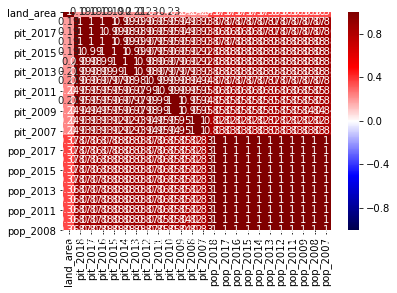

In [194]:
sns.heatmap(all_data_model_1_1.corr(), cmap="seismic", annot=True, vmin=-1, vmax=1);

In [196]:
# # Create your feature matrix (X) and target vector (y)
# y_pit, X_pit = patsy.dmatrices('c_2018 ~ c_2017 + c_2016 + c_2015 + c_2014 + c_2013 + c_2012 + c_2011 + c_2010 + c_2009 + c_2008 + c_2007', data=pit_data_model, return_type="dataframe")

# # Create your model
# model = sm.OLS(y_pit, X_pit)

# # Fit your model to your training set
# fit = model.fit()

# # Print summary statistics of the model's performance
# fit.summary()

In [205]:
# X1 = df[['X1','X3','X6']] # ANOTHER EXAMPLE: X = df.iloc[:, [1,3,6]] OR X = df.loc['X1','X3','X6']

X_1_1, y_1_1 = all_data_model_1_1.iloc[:, 5:], all_data_model_1_1['pit_2018']

# hold out 20% of the data for final testing
X_train, X_test, y_train, y_test = train_test_split(X_1_1, y_1_1, test_size=.2, random_state=10)

In [206]:
X_train.shape

(278, 25)

In [207]:
X_test.shape

(70, 25)

In [208]:
X_test.head()

,land_area,pit_2018,pit_2017,pit_2016,pit_2015,pit_2014,pit_2013,pit_2012,pit_2011,pit_2010,...,pop_2016,pop_2015,pop_2014,pop_2013,pop_2012,pop_2011,pop_2010,pop_2009,pop_2008,pop_2007
112,62.11,341,282,290,340,309,288,291,353,389.0,...,148001.0,147626.0,147767.0,147910.0,148227.0,147900.0,147433,146703.0,145621.0,143492.0
126,42.22,161,130,157,238,256,247,210,206,197.0,...,72550.0,73287.0,74163.0,74964.0,75451.0,75918.0,76122,76349.0,76582.0,77021.0
300,16.76,178,162,160,140,159,200,176,182,343.0,...,60616.0,60911.0,61297.0,61683.0,61883.0,62030.0,62235,62028.0,61791.0,61612.0
261,33.10,427,394,400,400,407,382,399,350,415.0,...,111659.0,111039.0,110951.0,110758.0,110635.0,110016.0,109565,109626.0,109753.0,109854.0
58,194.54,1551,1415,1302,1073,1219,1171,1127,1024,1463.0,...,458531.0,449189.0,441960.0,437981.0,432611.0,427248.0,416427,407876.0,402569.0,396538.0


In [209]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

lm = LinearRegression() # = tool from sklearn
# lm_reg = Ridge(alpha=1)

# kf = KFold(n_splits=5, shuffle=True, random_state = 71) # makes it easier to change after the fact

# cross_val_score(lm, X_cv, y_cv, # estimator, features, target
#                 cv=5, # number of folds 
#                 scoring='r2') # scoring metric

In [210]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [212]:
lm.coef_, lm.intercept_

(array([ 5.76810953e-13,  1.00000000e+00, -2.84888649e-13,  3.92778258e-14,
         1.68447071e-13, -1.90002094e-14,  1.43045298e-14,  4.62089134e-14,
         2.79826076e-14, -1.55840401e-13,  8.86888219e-14,  3.92481186e-15,
         1.26934054e-14, -3.10862447e-15, -4.99600361e-16,  1.38777878e-15,
         1.88737914e-15,  7.21644966e-16,  2.77555756e-16,  7.21644966e-16,
        -1.27675648e-15, -1.83186799e-15,  2.77555756e-16,  2.22044605e-16,
         6.10622664e-16]), 4.547473508864641e-12)

In [213]:
y_test_pred = lm.predict(X_test)

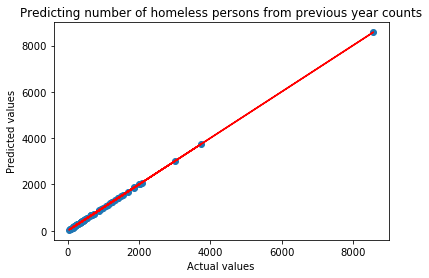

In [215]:
plt.scatter(y_test, y_test_pred)
# plt.xlim(0,10000)
# plt.ylim(0,10000)
plt.title("Predicting number of homeless persons from previous year counts")
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.plot(y_test,y_test,'r');

In [216]:
lm.score(X_test,y_test)

1.0

In [217]:
lm.score(X_train,y_train)

1.0

In [218]:
np.array([2,3,4])/np.array([1,2,3])

array([2.        , 1.5       , 1.33333333])

In [ ]:
print(np.mean(cross_val_score(lm, X_cv, y_cv, cv=kf, scoring='r2')))

In [ ]:

cross_val_score(lm_reg, X_cv, y_cv, cv=kf, scoring='r2')

In [ ]:
print(np.mean(cross_val_score(lm_reg, X_cv, y_cv, cv=kf, scoring='r2')))